In [124]:
import pandas as pd
import numpy as np
import sys
import matplotlib
import scipy as sp
import sklearn
import itertools

import random
import time

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, pairwise_distances
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn import datasets,linear_model
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score,precision_score,f1_score,classification_report

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.cm as cm
import seaborn as sns
from imblearn.over_sampling import ADASYN

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
%config InlineBackend.figure_format='retina'

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')


In [127]:
df2 = df.copy()

In [128]:
df2

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [129]:
df2.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

In [130]:
df2.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [131]:
df2.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [132]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

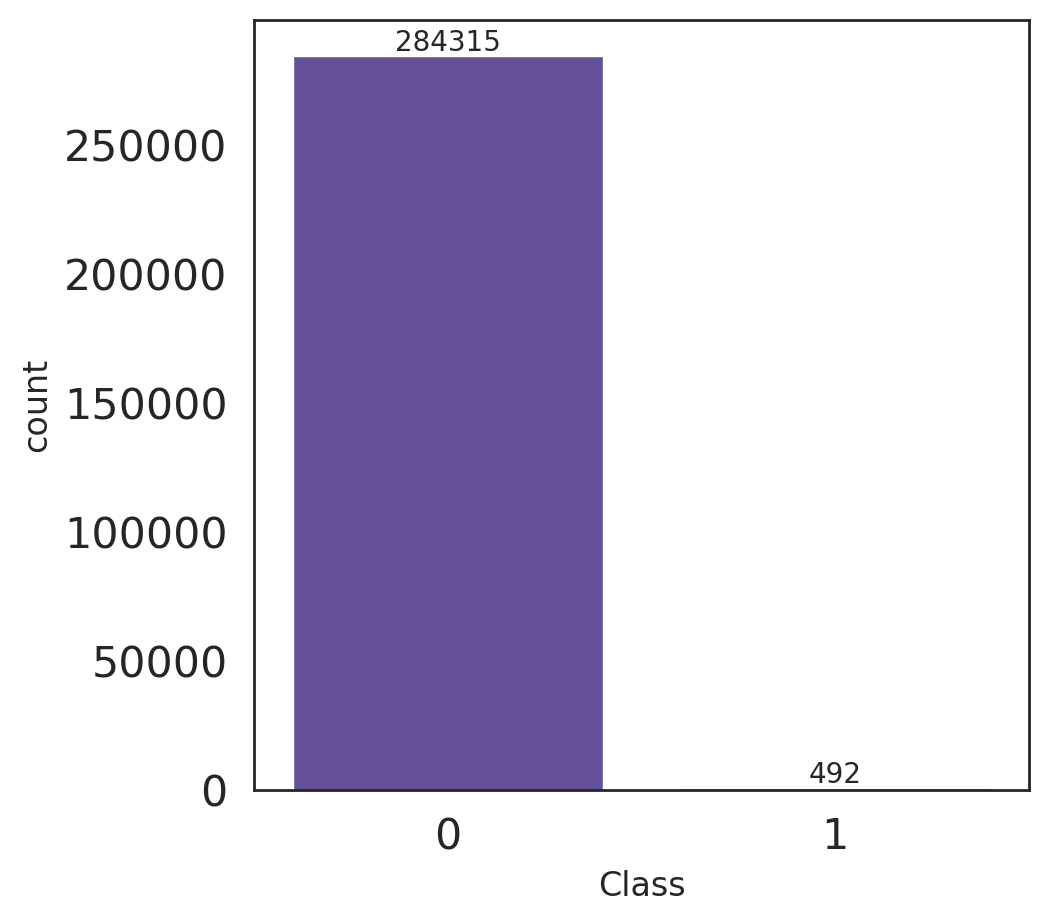

In [133]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = df2['Class'], data = df2, palette="twilight")
for i in ax.containers:
    ax.bar_label(i,)

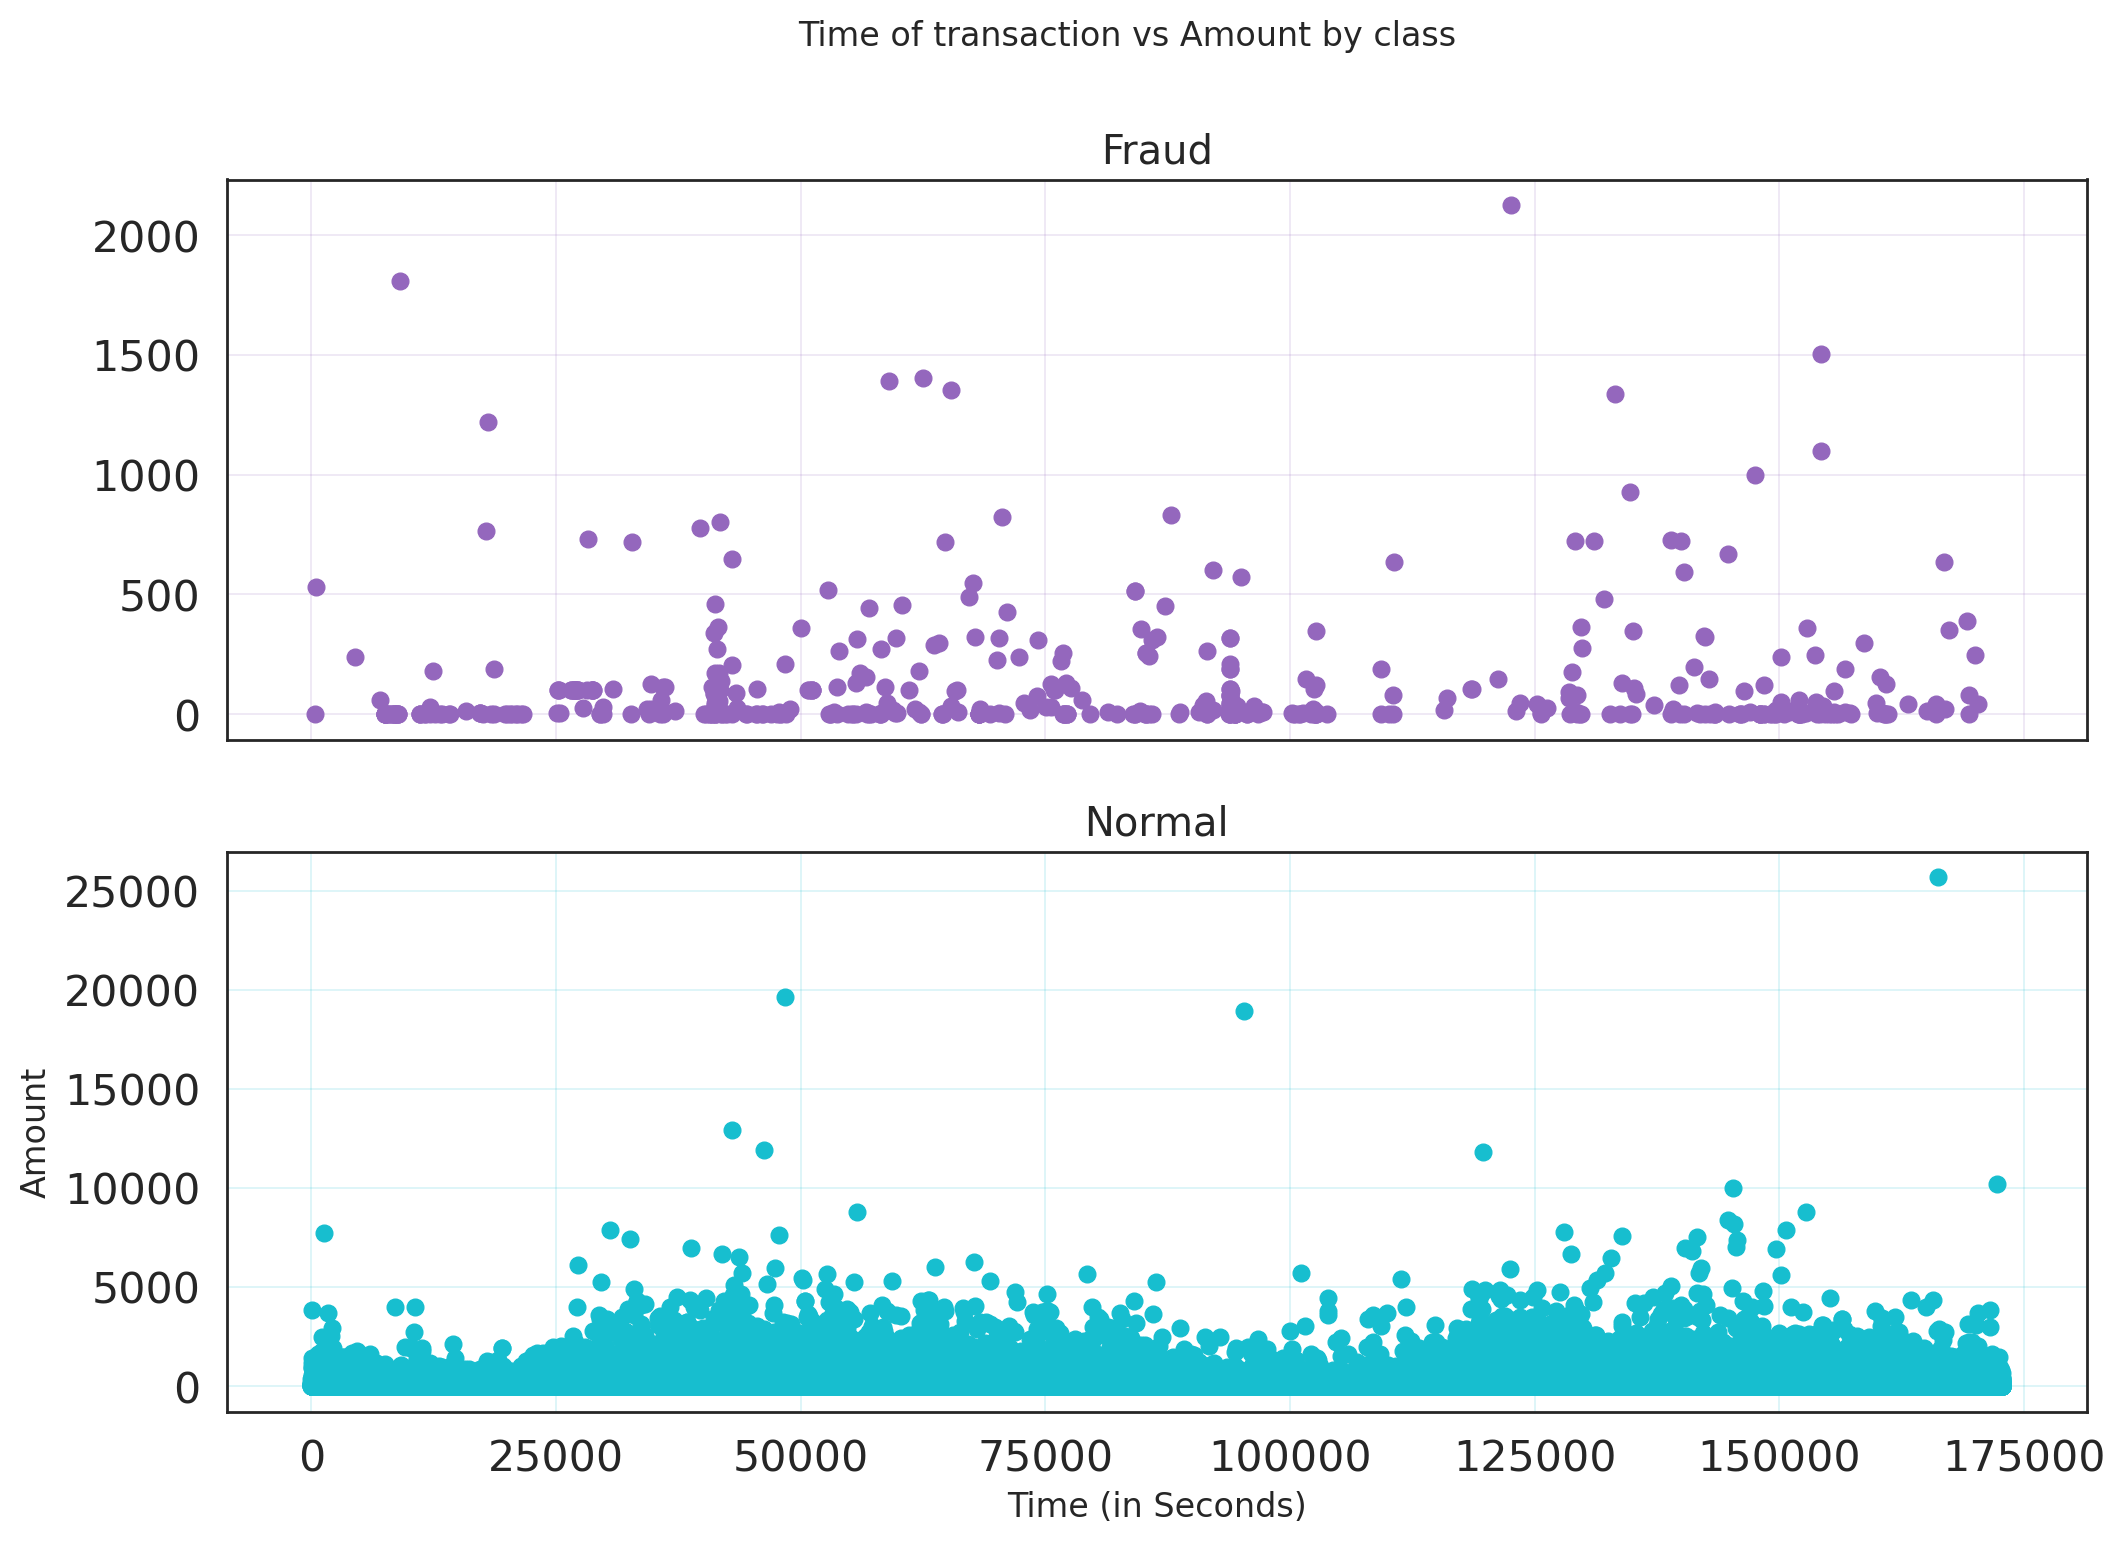

In [134]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(df[df.Class == 1].Time, df[df.Class == 1].Amount, color = '#9467bd')
ax1.set_title('Fraud')
ax1.grid(color='#9467bd', linestyle='-', linewidth=0.1)


ax2.scatter(df[df.Class == 0].Time, df[df.Class == 0].Amount, color = '#17becf')
ax2.set_title('Normal')
ax2.grid(color='#17becf', linestyle='-', linewidth=0.1)


plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [135]:
data = df2.drop(['Time'], axis=1)

In [136]:
X = data.drop(["Class"], axis=1)
# just get class column in y
y = data["Class"]

In [137]:
X

V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V20       V21  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.251412 -0.018307   
1      -0.078803  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775   
2       0.791461  0.247676 -1.514654  0.207643  ...  0.524980  0.247998   
3       0.237609  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300   
4       0.592941 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -4.918215  7.305334  1.914428  4.356170  ...  1.475829  0.213454   
284803  0.024330  0.294869  0.584800 -0.975926  ...  0.059616  0.214205   
284804 -0.296827  0.708417  0.432454 -0.484782  ...  0.001396  0.232045   
284805 -0.686180  0.679145  0.392087 -0.399126  ...  0.127434  0.265245   
284806  1.577006 -0.414650  0.486180 -0.915427  ...  0.382948  0.261057   

             V22       V23       V24       V25       V26       V27       V28  \
0       0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1      -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2       0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3       0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4       0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   
...          ...       ...       ...       ...       ...       ...       ...   
284802  0.111864  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731   
284803  0.924384  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   
284804  0.578229 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   
284805  0.800049 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   
284806  0.643078  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649   

        Amount  
0       149.62  
1         2.69  
2       378.66  
3       123.50  
4        69.99  
...        ...  
284802    0.77  
284803   24.79  
284804   67.88  
284805   10.00  
284806  217.00  

[284807 rows x 29 columns]

In [138]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [140]:
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

In [141]:
lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200, n_jobs=-1, random_state=0)

In [142]:
lr_predict = lr.predict(X_test)


Recall :  0.5816326530612245
F1 :  0.6951219512195121
Accuracy of Logistic Regression: 99.9122%


classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



<Axes: >

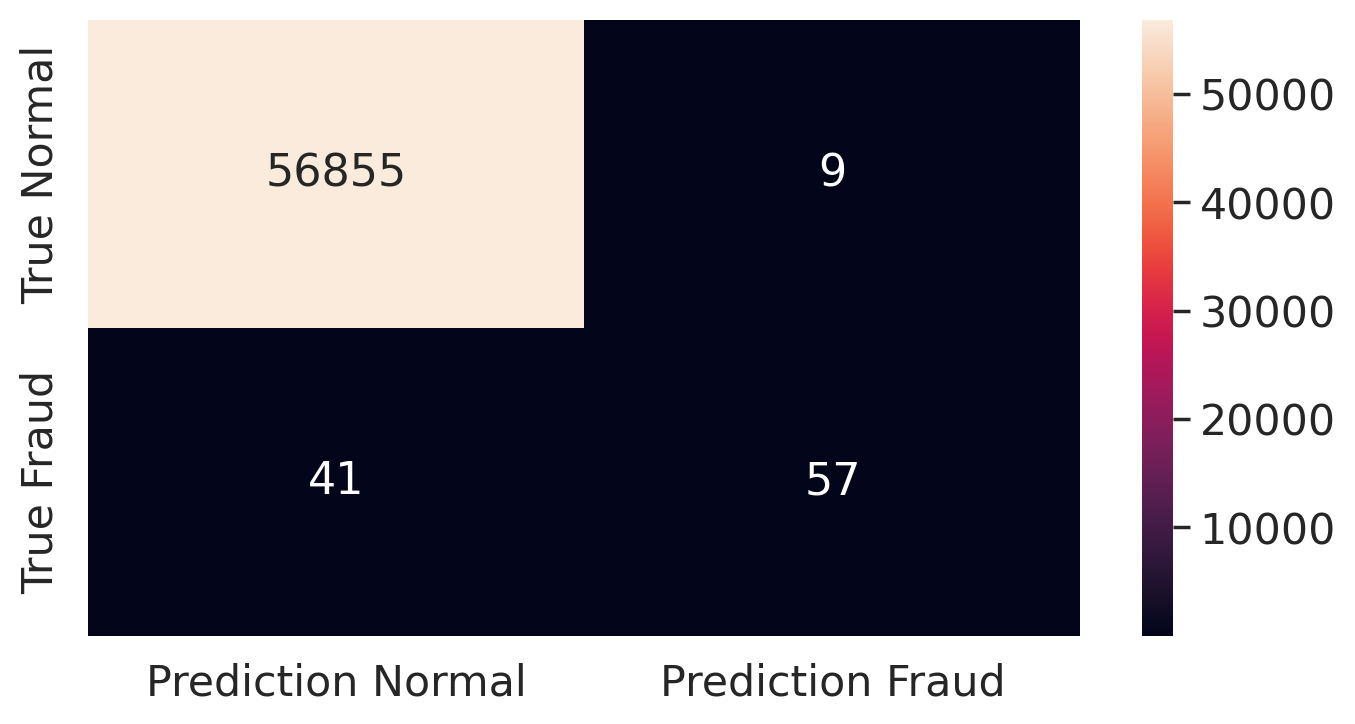

In [143]:
lr_accuracy = accuracy_score(y_test, lr_predict)
lr_recall_1 = recall_score(y_test, lr_predict)
lr_cm = confusion_matrix(y_test, lr_predict)
lr_auc1 = roc_auc_score(y_test, lr_predict)
lr_precision = precision_score(y_test, lr_predict)
lr_f1_1 = f1_score(y_test, lr_predict)
lr_cl = classification_report(y_test, lr_predict)
print("Recall : ", lr_recall_1)
print("F1 : ", lr_f1_1)
print("Accuracy of Logistic Regression: {:.4%}\n\n".format(lr_accuracy))
print("classification report:\n",(lr_cl))

lr_cm = pd.DataFrame(lr_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(lr_cm, annot=True,annot_kws={"size": 16},fmt='d')

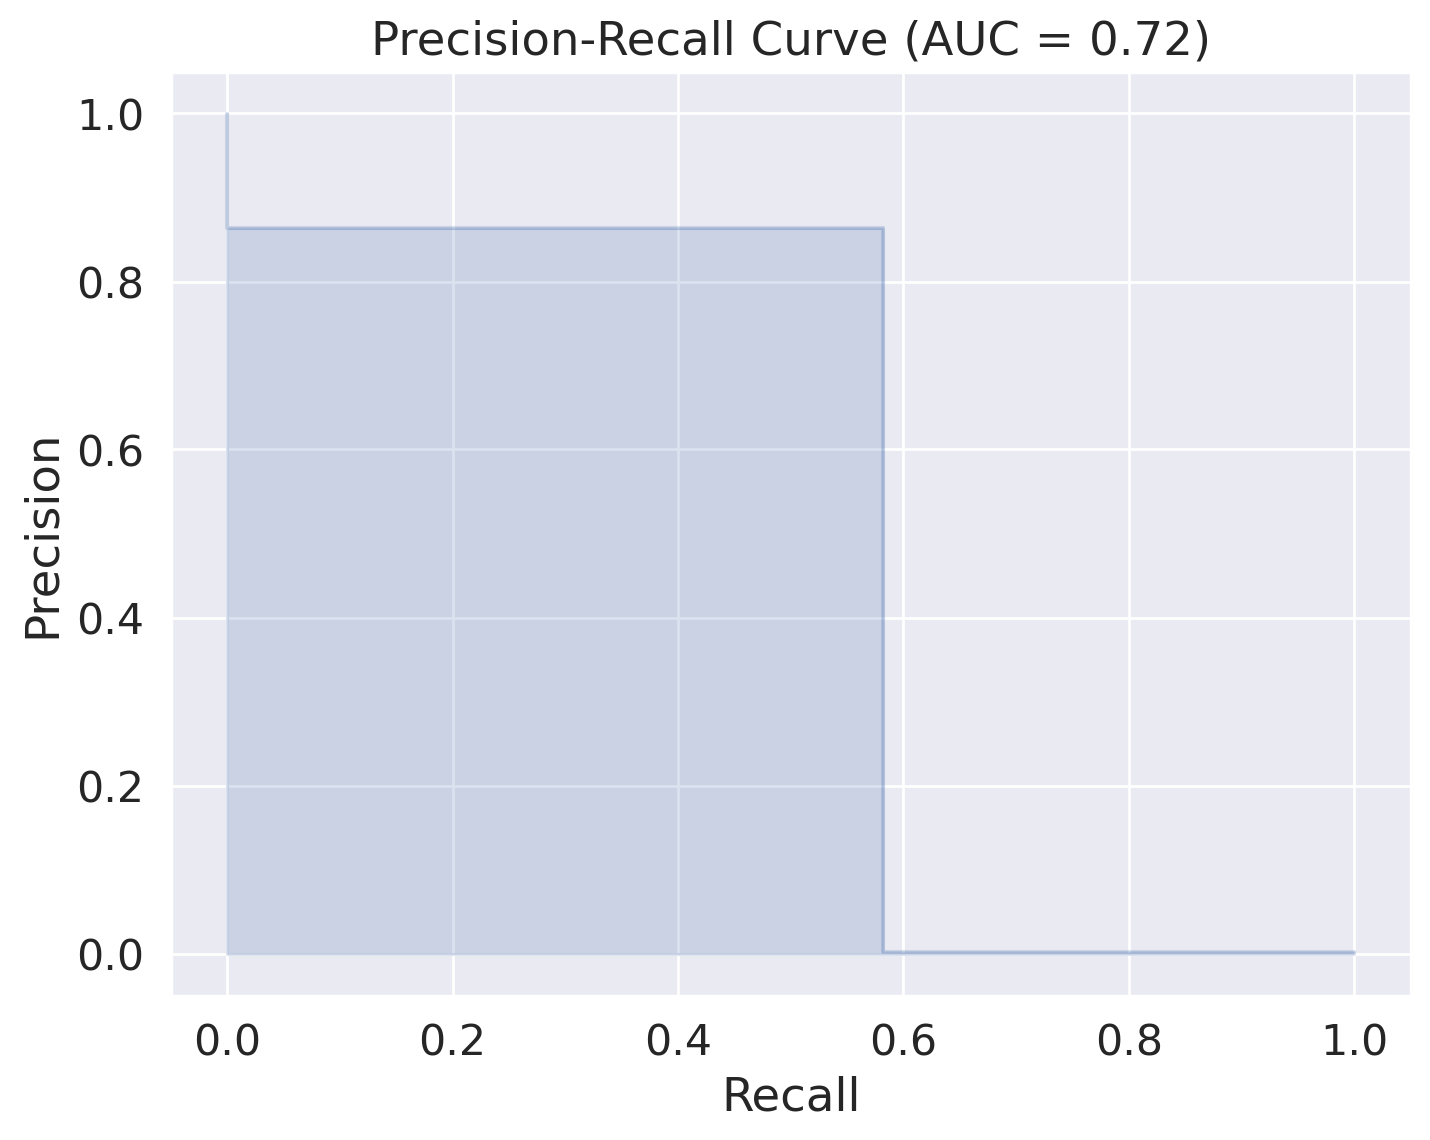

In [144]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, _ = precision_recall_curve(y_test, lr_predict)
auc_score1 = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC = {auc_score1:.2f})')
plt.show()

In [145]:
oversampler = SMOTE(random_state = 0, n_jobs = -1)
X_train_over , y_train_over = oversampler.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [146]:
lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lr.fit(X_train_over, y_train_over)

LogisticRegression(max_iter=200, n_jobs=-1, random_state=0)

In [147]:
lr_predict = lr.predict(X_test)


Recall :  0.9183673469387755
F1 :  0.10909090909090909
Accuracy of Logistic Regression: 97.4193%


classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



<Axes: >

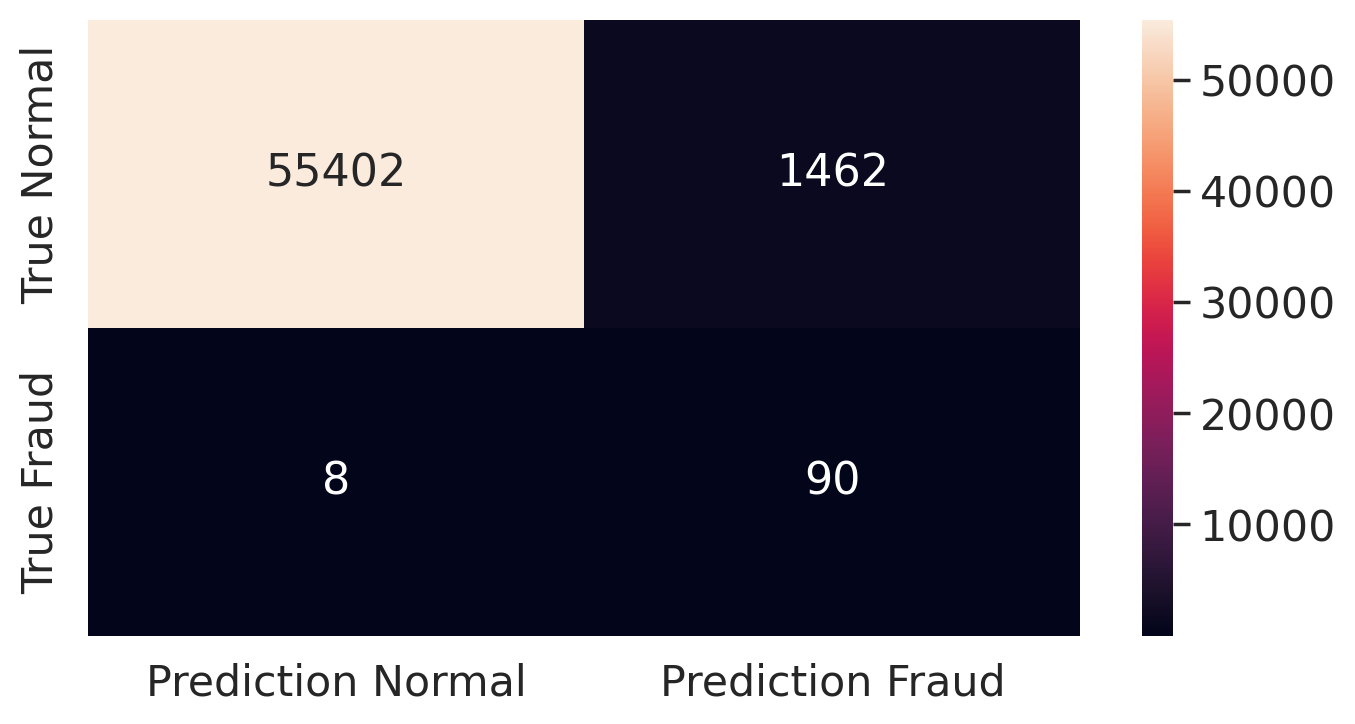

In [148]:
lr_accuracy = accuracy_score(y_test, lr_predict)
lr_recall_2 = recall_score(y_test, lr_predict)
lr_cm = confusion_matrix(y_test, lr_predict)
lr_auc2 = roc_auc_score(y_test, lr_predict)
lr_precision = precision_score(y_test, lr_predict)
lr_f1_2 = f1_score(y_test, lr_predict)
lr_cl = classification_report(y_test, lr_predict)
print("Recall : ", lr_recall_2)
print("F1 : ", lr_f1_2)
print("Accuracy of Logistic Regression: {:.4%}\n\n".format(lr_accuracy))
print("classification report:\n",(lr_cl))

lr_cm = pd.DataFrame(lr_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(lr_cm, annot=True,annot_kws={"size": 16},fmt='d')

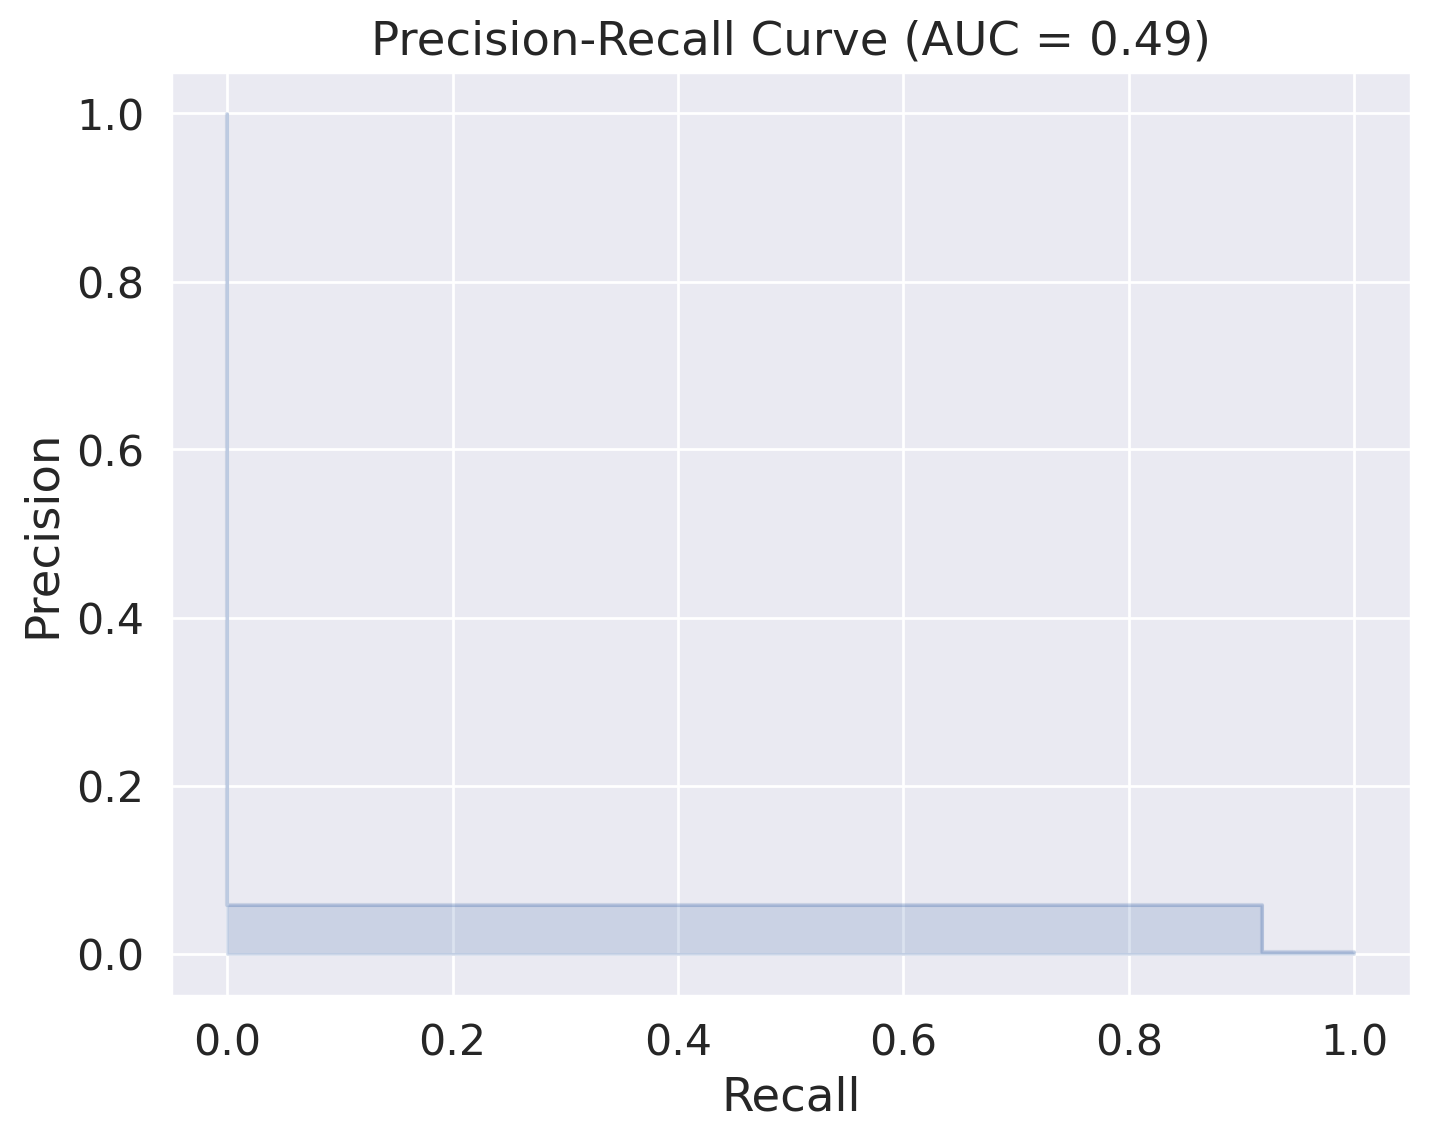

In [149]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, _ = precision_recall_curve(y_test, lr_predict)
auc_score2 = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC = {auc_score2:.2f})')
plt.show()

In [150]:
# import UnderSampler
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state=0)
X_train_under, y_train_under = under_sample.fit_resample(X_train, y_train)

In [151]:
lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lr.fit(X_train_under, y_train_under)

LogisticRegression(max_iter=200, n_jobs=-1, random_state=0)

In [152]:
lr_predict = lr.predict(X_test)


Recall :  0.9285714285714286
F1 :  0.11104331909701037
Accuracy of Logistic Regression: 97.4422%


classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.93      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



<Axes: >

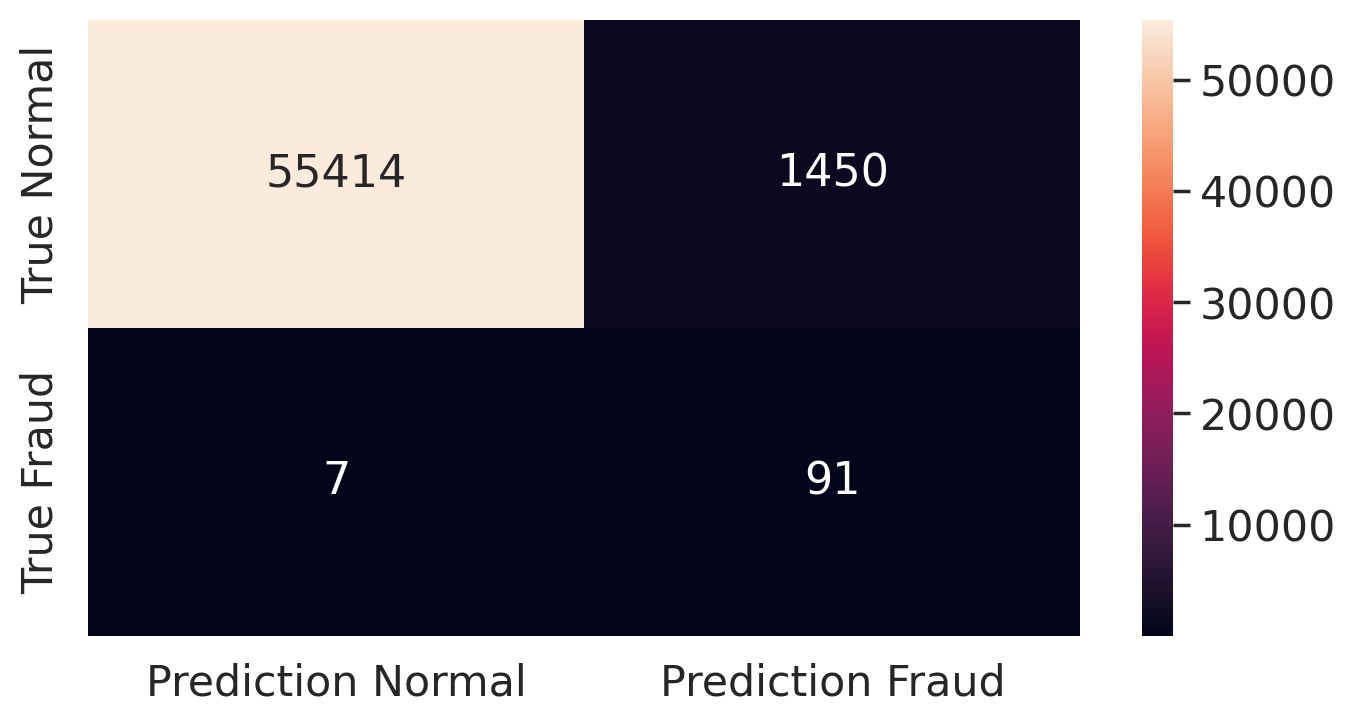

In [153]:
lr_accuracy = accuracy_score(y_test, lr_predict)
lr_recall_3 = recall_score(y_test, lr_predict)
lr_cm = confusion_matrix(y_test, lr_predict)
lr_auc3 = roc_auc_score(y_test, lr_predict)
lr_precision = precision_score(y_test, lr_predict)
lr_f1_3 = f1_score(y_test, lr_predict)
lr_cl = classification_report(y_test, lr_predict)
print("Recall : ", lr_recall_3)
print("F1 : ", lr_f1_3)
print("Accuracy of Logistic Regression: {:.4%}\n\n".format(lr_accuracy))
print("classification report:\n",(lr_cl))

lr_cm = pd.DataFrame(lr_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(lr_cm, annot=True,annot_kws={"size": 16},fmt='d')

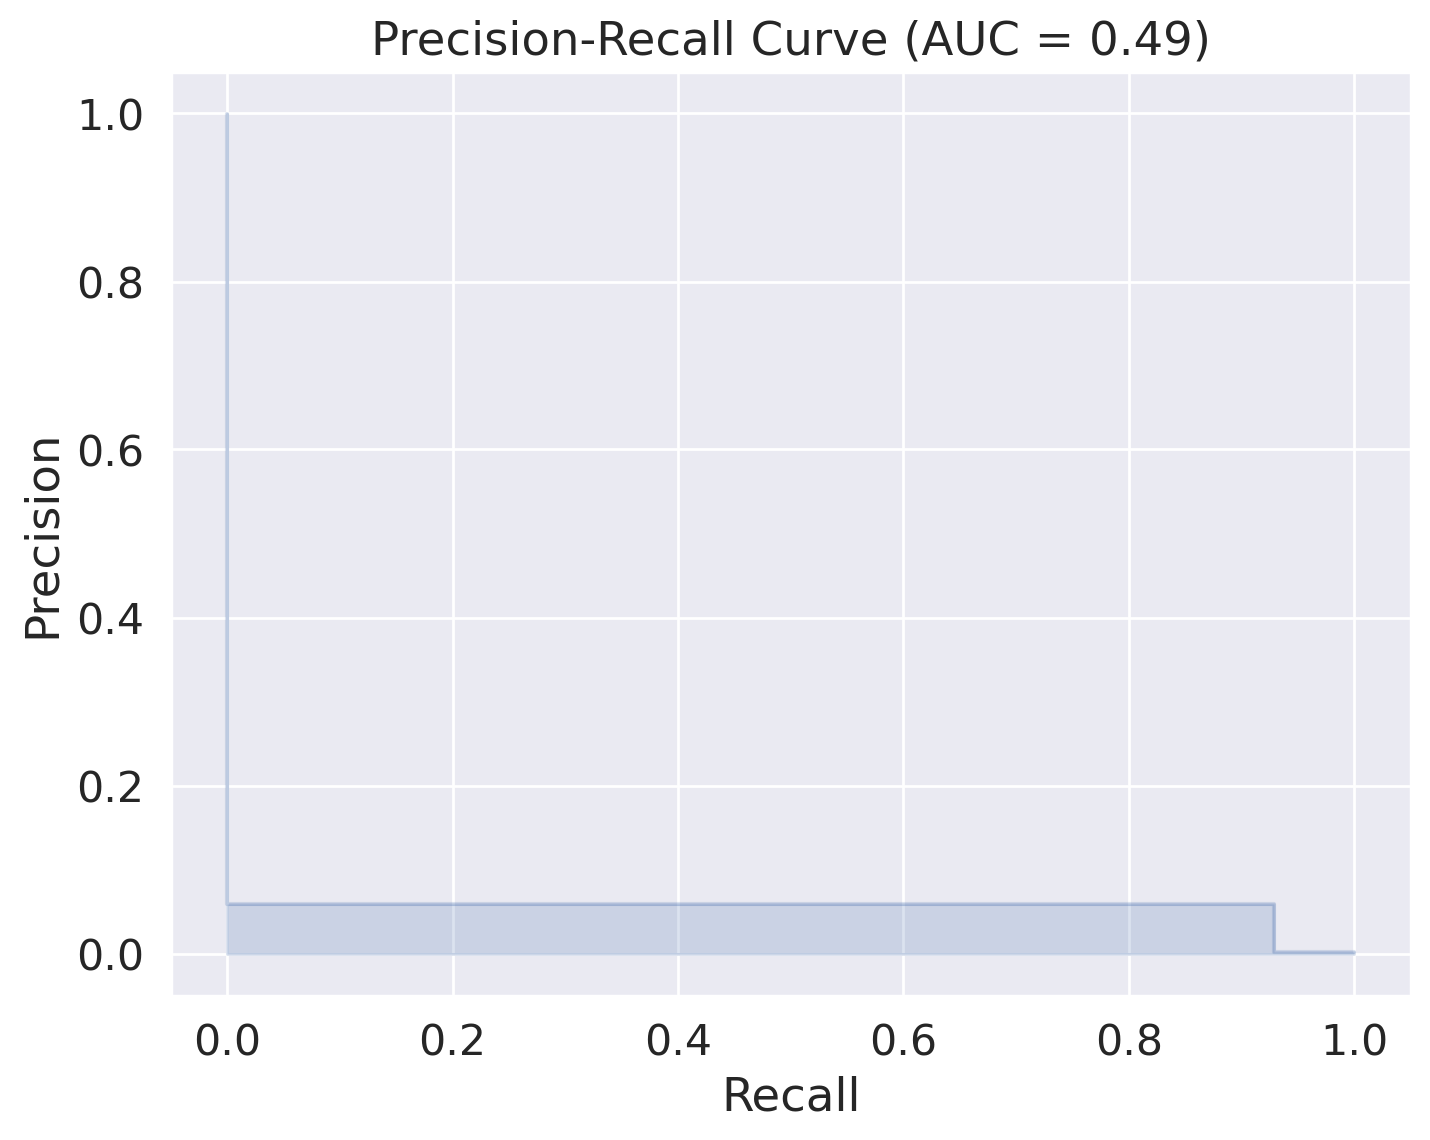

In [154]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, _ = precision_recall_curve(y_test, lr_predict)
auc_score3 = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC = {auc_score3:.2f})')
plt.show()

In [155]:
auc_score = max(auc_score1, auc_score2, auc_score3)
print("Max of AUC", auc_score)

f1_score_lr = max(lr_f1_1, lr_f1_2, lr_f1_3)
print("Max of F1", f1_score)

recall_score_lr = max(lr_recall_1, lr_recall_2, lr_recall_3)
print("Max of Recall", recall_score_lr)

Max of AUC 0.7229943973976337
Max of F1 <function f1_score at 0x7be2bb110280>
Max of Recall 0.9285714285714286


In [156]:
df3 = df.copy()

In [157]:
def optimise_k_means(data, max_k):
  means = []
  interias = []

  for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)

    means.append(k)
    interias.append(kmeans.inertia_)

  fig = plt.subplots(figsize=(10, 5))
  plt.plot(means, interias, 'o-')
  plt.xlabel("Number of cluster", fontsize=16)
  plt.ylabel("Inertia", fontsize=16)
  plt.grid(True)
  plt.show();

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

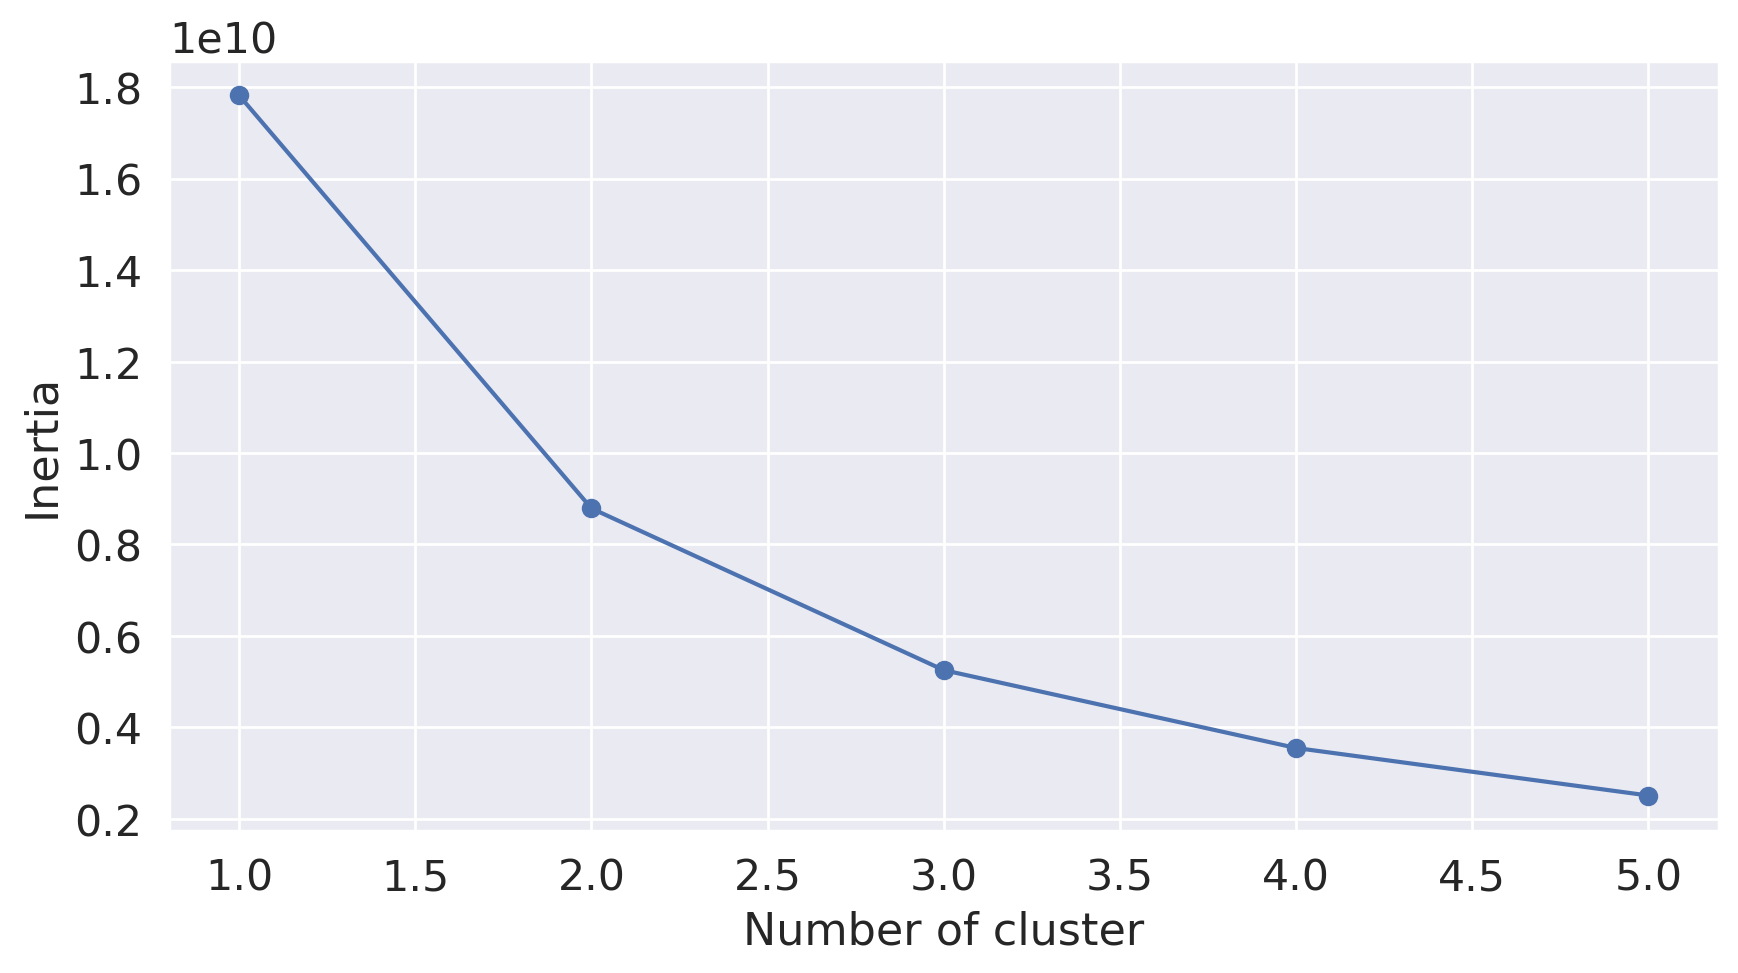

In [158]:
optimise_k_means(df3[['Class', 'Amount']], 6)

In [159]:
scaler = StandardScaler()
df3['Amount'] = scaler.fit_transform(df3[['Amount']])
df3 = df3.drop('Time', axis=1)

In [160]:
df3

V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V21       V22  \
0       0.239599  0.098698  0.363787  0.090794  ... -0.018307  0.277838   
1      -0.078803  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672   
2       0.791461  0.247676 -1.514654  0.207643  ...  0.247998  0.771679   
3       0.237609  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274   
4       0.592941 -0.270533  0.817739  0.753074  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -4.918215  7.305334  1.914428  4.356170  ...  0.213454  0.111864   
284803  0.024330  0.294869  0.584800 -0.975926  ...  0.214205  0.924384   
284804 -0.296827  0.708417  0.432454 -0.484782  ...  0.232045  0.578229   
284805 -0.686180  0.679145  0.392087 -0.399126  ...  0.265245  0.800049   
284806  1.577006 -0.414650  0.486180 -0.915427  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28    Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  0.244964   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724 -0.342475   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  1.160686   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  0.140534   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153 -0.073403   
...          ...       ...       ...       ...       ...       ...       ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731 -0.350151   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527 -0.254117   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561 -0.081839   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533 -0.313249   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  0.514355   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 30 columns]

In [161]:
kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans.fit(df3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [162]:
cluster1 = df3[kmeans.labels_==0]
cluster2 = df3[kmeans.labels_==1]

In [163]:
len(cluster1), len(cluster2)

(134745, 150062)

In [164]:
cluster1.describe()

V1             V2             V3             V4  \
count  134745.000000  134745.000000  134745.000000  134745.000000   
mean        1.455976      -0.545227      -0.479483       0.265321   
std         0.649770       1.020007       1.181942       1.198862   
min       -14.641710     -28.554825     -16.233798      -3.916031   
25%         1.143727      -0.929963      -1.344158      -0.576041   
50%         1.362476      -0.352028      -0.316122       0.317831   
75%         1.986046       0.042760       0.434363       0.893491   
max         2.454930       7.016714       2.824841      10.343228   

                  V5             V6             V7             V8  \
count  134745.000000  134745.000000  134745.000000  134745.000000   
mean       -0.306800      -0.032987      -0.284078       0.001834   
std         0.971809       1.156827       0.715717       0.393087   
min       -40.427726      -4.153568     -11.199975     -12.454357   
25%        -0.916394      -0.743324      -0.712713      -0.204233   
50%        -0.362390      -0.291400      -0.248699      -0.029098   
75%         0.213601       0.297900       0.131158       0.172610   
max         5.998306      23.917837      44.054461       4.014722   

                  V9            V10  ...            V21            V22  \
count  134745.000000  134745.000000  ...  134745.000000  134745.000000   
mean        0.198955       0.150970  ...      -0.023344      -0.073640   
std         0.995082       0.709547  ...       0.303513       0.666351   
min        -5.902828     -13.691315  ...      -5.120828      -5.221075   
25%        -0.377821      -0.251742  ...      -0.220880      -0.588835   
50%         0.192832       0.039982  ...      -0.042395      -0.047273   
75%         0.820606       0.611537  ...       0.150833       0.414409   
max         5.450566       4.048655  ...       5.788207       2.527417   

                 V23            V24            V25            V26  \
count  134745.000000  134745.000000  134745.000000  134745.000000   
mean       -0.007111       0.001090       0.122113       0.010300   
std         0.325705       0.600054       0.403447       0.495537   
min       -17.018295      -2.836627      -3.741618      -1.773575   
25%        -0.116533      -0.352200      -0.177127      -0.325333   
50%         0.006946       0.043224       0.184950      -0.071082   
75%         0.151550       0.437418       0.412944       0.241963   
max         7.040028       4.014444       2.520869       3.122747   

                 V27            V28         Amount          Class  
count  134745.000000  134745.000000  134745.000000  134745.000000  
mean       -0.016177      -0.002085       0.048175       0.000994  
std         0.089448       0.066405       1.008814       0.031520  
min        -2.710252      -2.713136      -0.353229       0.000000  
25%        -0.056223      -0.042787      -0.324443       0.000000  
50%        -0.013401       0.000649      -0.239524       0.000000  
75%         0.028406       0.024859       0.006558       0.000000  
max         4.753930       1.422017      40.425011       1.000000  

[8 rows x 30 columns]

In [165]:
cluster2.describe()

V1             V2             V3             V4  \
count  150062.000000  150062.000000  150062.000000  150062.000000   
mean       -1.307363       0.489575       0.430542      -0.238240   
std         1.813722       1.932484       1.648395       1.547328   
min       -56.407510     -72.715728     -48.325589      -5.683171   
25%        -1.546113       0.015797      -0.336193      -1.129381   
50%        -0.856279       0.735948       0.713442      -0.384847   
75%        -0.423084       1.163049       1.465288       0.569839   
max         1.448939      22.057729       9.382558      16.875344   

                  V5             V6             V7             V8  \
count  150062.000000  150062.000000  150062.000000  150062.000000   
mean        0.275485       0.029620       0.255082      -0.001647   
std         1.614712       1.471471       1.518916       1.602689   
min      -113.743307     -26.160506     -43.557242     -73.216718   
25%        -0.376206      -0.793317      -0.225355      -0.216045   
50%         0.246920      -0.254702       0.391349       0.103173   
75%         0.926734       0.504910       0.866621       0.516539   
max        34.801666      73.301626     120.589494      20.007208   

                  V9            V10  ...            V21            V22  \
count  150062.000000  150062.000000  ...  150062.000000  150062.000000   
mean       -0.178647      -0.135560  ...       0.020961       0.066123   
std         1.155083       1.326375  ...       0.969710       0.769149   
min       -13.434066     -24.588262  ...     -34.830382     -10.933144   
25%        -0.781943      -0.772538  ...      -0.235217      -0.507380   
50%        -0.255215      -0.308466  ...      -0.011260       0.082104   
75%         0.342152       0.297272  ...       0.219106       0.620703   
max        15.594995      23.745136  ...      27.202839      10.503090   

                 V23            V24            V25            V26  \
count  150062.000000  150062.000000  150062.000000  150062.000000   
mean        0.006385      -0.000979      -0.109649      -0.009248   
std         0.802969       0.610626       0.586651       0.469764   
min       -44.807735      -2.824849     -10.295397      -2.604551   
25%        -0.209112      -0.356873      -0.432326      -0.329641   
50%        -0.032625       0.038988      -0.138910      -0.029599   
75%         0.142096       0.441733       0.226326       0.239885   
max        22.528412       4.584549       7.519589       3.517346   

                 V27            V28         Amount          Class  
count  150062.000000  150062.000000  150062.000000  150062.000000  
mean        0.014526       0.001872      -0.043257       0.002386  
std         0.549163       0.450358       0.990030       0.048785  
min       -22.565679     -15.430084      -0.353229       0.000000  
25%        -0.123457      -0.097266      -0.333279       0.000000  
50%         0.054020       0.051200      -0.281064       0.000000  
75%         0.230250       0.143829      -0.093354       0.000000  
max        31.612198      33.847808     102.362243       1.000000  

[8 rows x 30 columns]

count of class 0 in cluster 1 :  134611
count of class 1 in cluster 1 :  134
count of class 0 in cluster 2 :  149704
count of class 1 in cluster 2 :  358
--------------------------------------------------
If cluster 1 is Fraud and cluster 2 is Non-Fraud:
Confusion Matrix : 


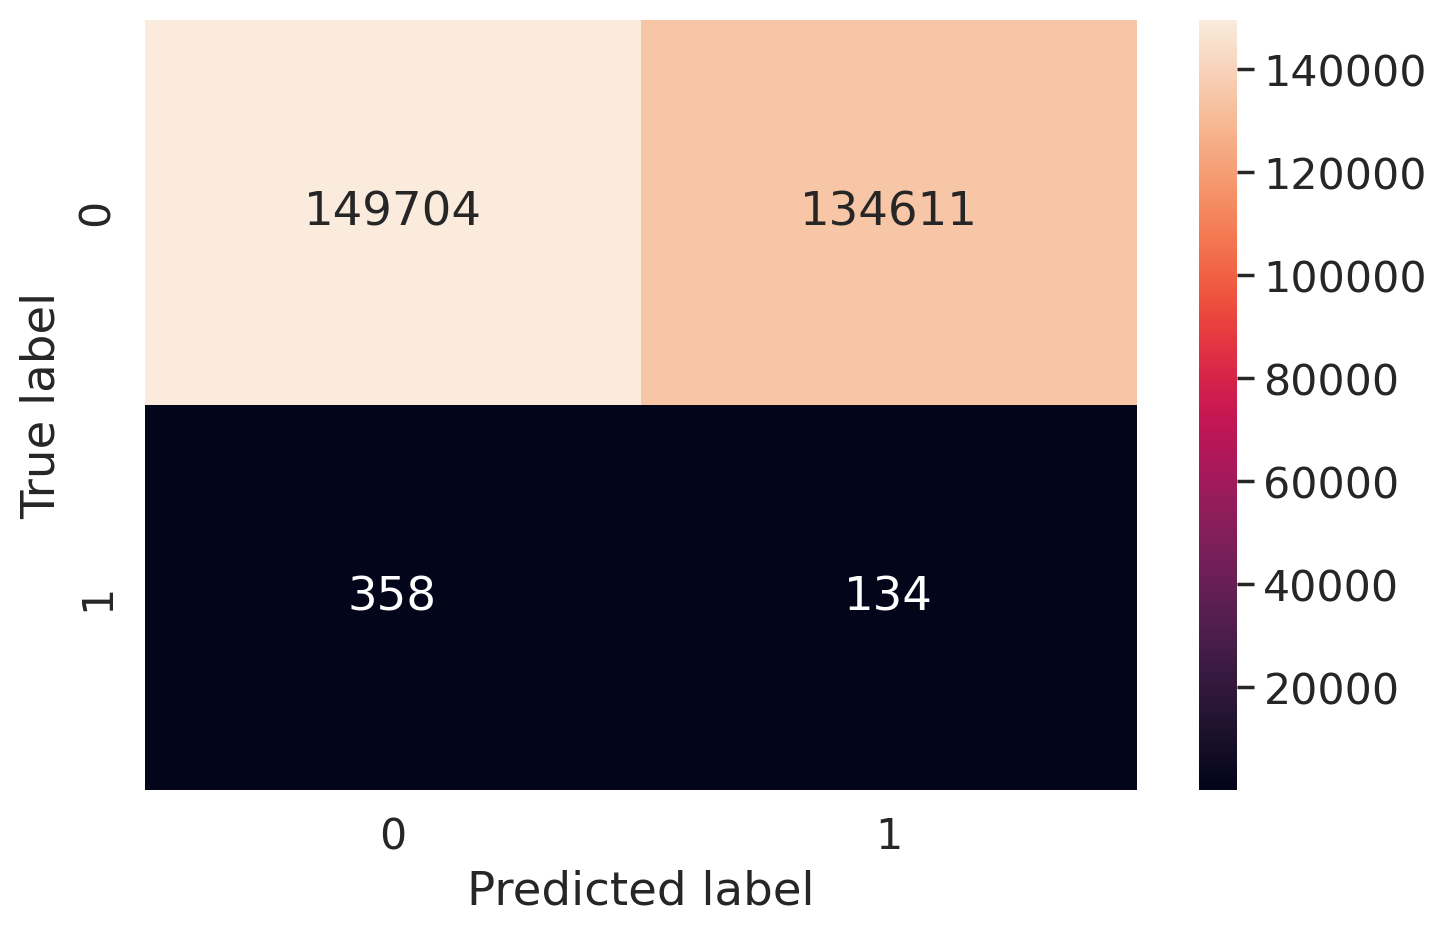

Accuracy Score :  0.53
Recall Score :  0.27
Precision Score :  0.0
F1 Score :  0.0
AUC Score :  0.4
--------------------------------------------------
If cluster 2 is Fraud and cluster 1 is Non-Fraud:
Confusion Matrix : 


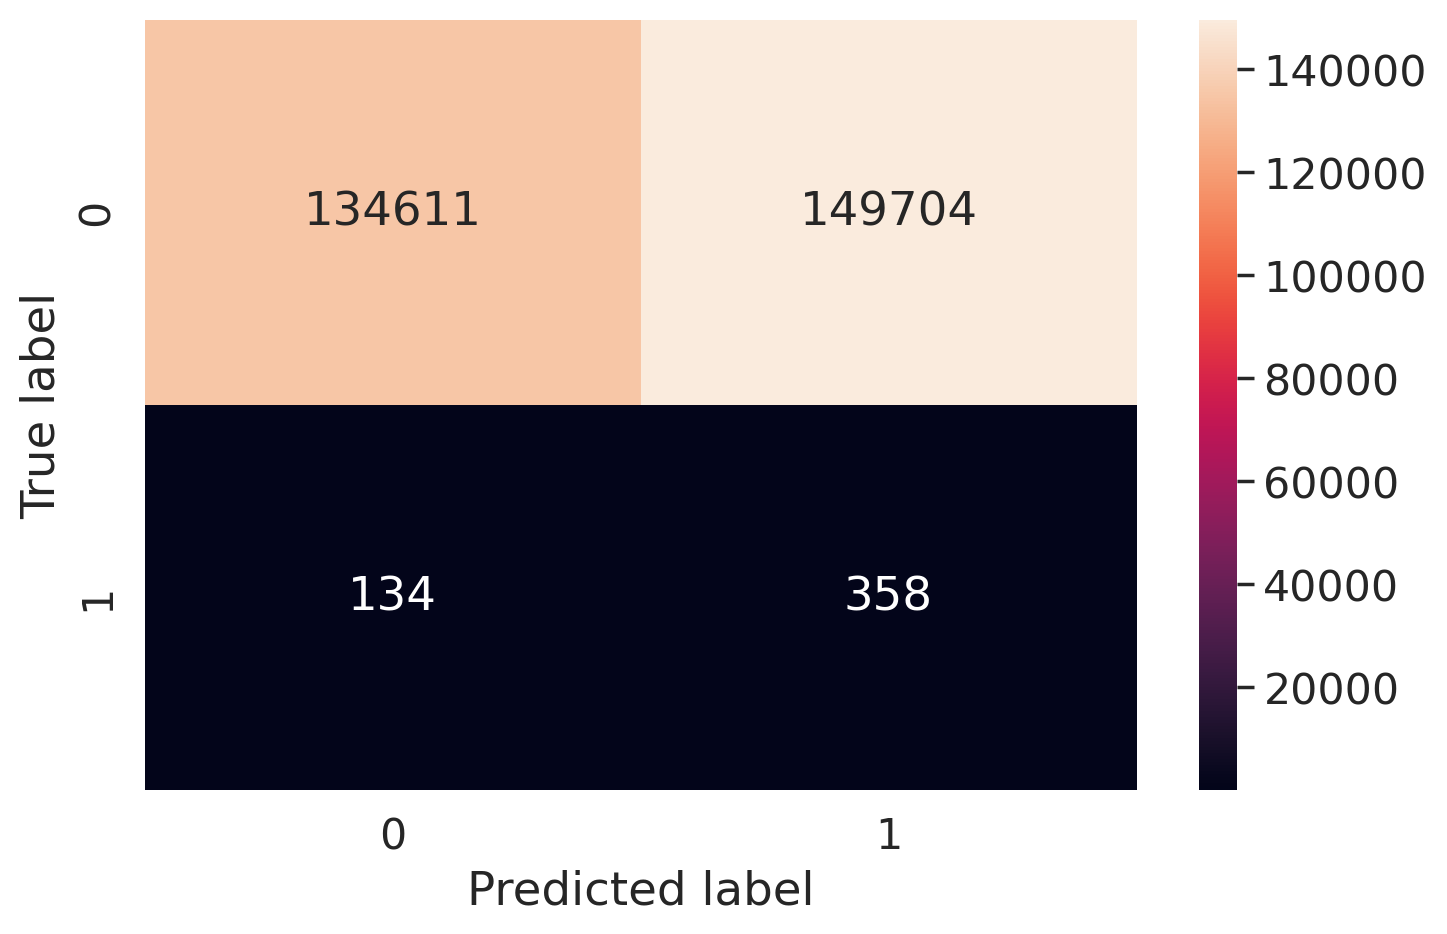

Accuracy Score :  0.47
Recall Score :  0.73
Precision Score :  0.0
F1 Score :  0.0
AUC Score :  0.6


In [166]:
count_of_class_0_in_cluster_1 = len(y[kmeans.labels_==0][y[kmeans.labels_==0]==0])
count_of_class_1_in_cluster_1 = len(y[kmeans.labels_==0][y[kmeans.labels_==0]==1])

count_of_class_0_in_cluster_2 = len(y[kmeans.labels_==1][y[kmeans.labels_==1]==0])
count_of_class_1_in_cluster_2 = len(y[kmeans.labels_==1][y[kmeans.labels_==1]==1])

print('count of class 0 in cluster 1 : ', count_of_class_0_in_cluster_1)
print('count of class 1 in cluster 1 : ', count_of_class_1_in_cluster_1)

print('count of class 0 in cluster 2 : ', count_of_class_0_in_cluster_2)
print('count of class 1 in cluster 2 : ', count_of_class_1_in_cluster_2)

print('-'*50)
print('If cluster 1 is Fraud and cluster 2 is Non-Fraud:')
# Confusion Matrix
Tn = count_of_class_0_in_cluster_2
Tp = count_of_class_1_in_cluster_1
Fp = count_of_class_0_in_cluster_1
Fn = count_of_class_1_in_cluster_2

print('Confusion Matrix : ')
plt.figure(figsize = (8,5))
sns.heatmap([[Tn, Fp], [Fn, Tp]], annot=True,fmt='d');
plt.ylabel('True label');
plt.xlabel('Predicted label');
plt.show()

accuracy = round((Tn+Tp)/(Tn+Tp+Fp+Fn),2)
print('Accuracy Score : ', accuracy)
recall = round(Tp/(Tp+Fn),2)
print('Recall Score : ', recall)
precision = round(Tp/(Tp+Fp),2)
print('Precision Score : ', precision)
f1 = round(2*(precision*recall)/(precision+recall),2)
print('F1 Score : ', f1)
auc = round((Tp/(Tp+Fn) + Tn/(Tn+Fp))/2,2)
print('AUC Score : ', auc)

# calculate auc from confusion matrix


print('-'*50)
print('If cluster 2 is Fraud and cluster 1 is Non-Fraud:')
print('Confusion Matrix : ')
Tn = count_of_class_0_in_cluster_1
Tp = count_of_class_1_in_cluster_2
Fp = count_of_class_0_in_cluster_2
Fn = count_of_class_1_in_cluster_1

plt.figure(figsize = (8,5))
sns.heatmap([[Tn, Fp], [Fn, Tp]], annot=True,fmt='d');
plt.ylabel('True label');
plt.xlabel('Predicted label');
plt.show()


accuracy2  = round((Tn+Tp)/(Tn+Tp+Fp+Fn),2)
print('Accuracy Score : ', accuracy2)
recall2 = round(Tp/(Tp+Fn),2)
print('Recall Score : ', recall2)
precision2 = round(Tp/(Tp+Fp),2)
print('Precision Score : ', precision2)
f1_2 = round(2*(precision2*recall2)/(precision2+recall2),2)
print('F1 Score : ', f1)
auc2 = round((Tp/(Tp+Fn) + Tn/(Tn+Fp))/2,2)
print('AUC Score : ', auc2)
auc = max(auc, auc2)
accuracy = max(accuracy, accuracy2)

In [167]:
f1_kmeans = max(f1, f1_2)
print("Max of F1 : ", f1_kmeans)

recall_kmeans = max(recall, recall2)
print("Max of Recall : ", recall_kmeans)

Max of F1 :  0.0
Max of Recall :  0.73


In [168]:
Prediction_Accuracy={
    'Logistic Regression': lr_accuracy,
    'K-Means': accuracy
}

Prediction_AUC={
    'Logistic Regression': auc_score,
    'K-Means': auc
}
Prediction_F1={
    'Logistic Regression': f1_score_lr,
    'K-Means': f1_kmeans
}

Prediction_Recall={
    'Logistic Regression': recall_score_lr,
    'K-Means': recall_kmeans
}

In [169]:
accuracy

0.53

Text(0.5, 0, 'Accuracy Score')

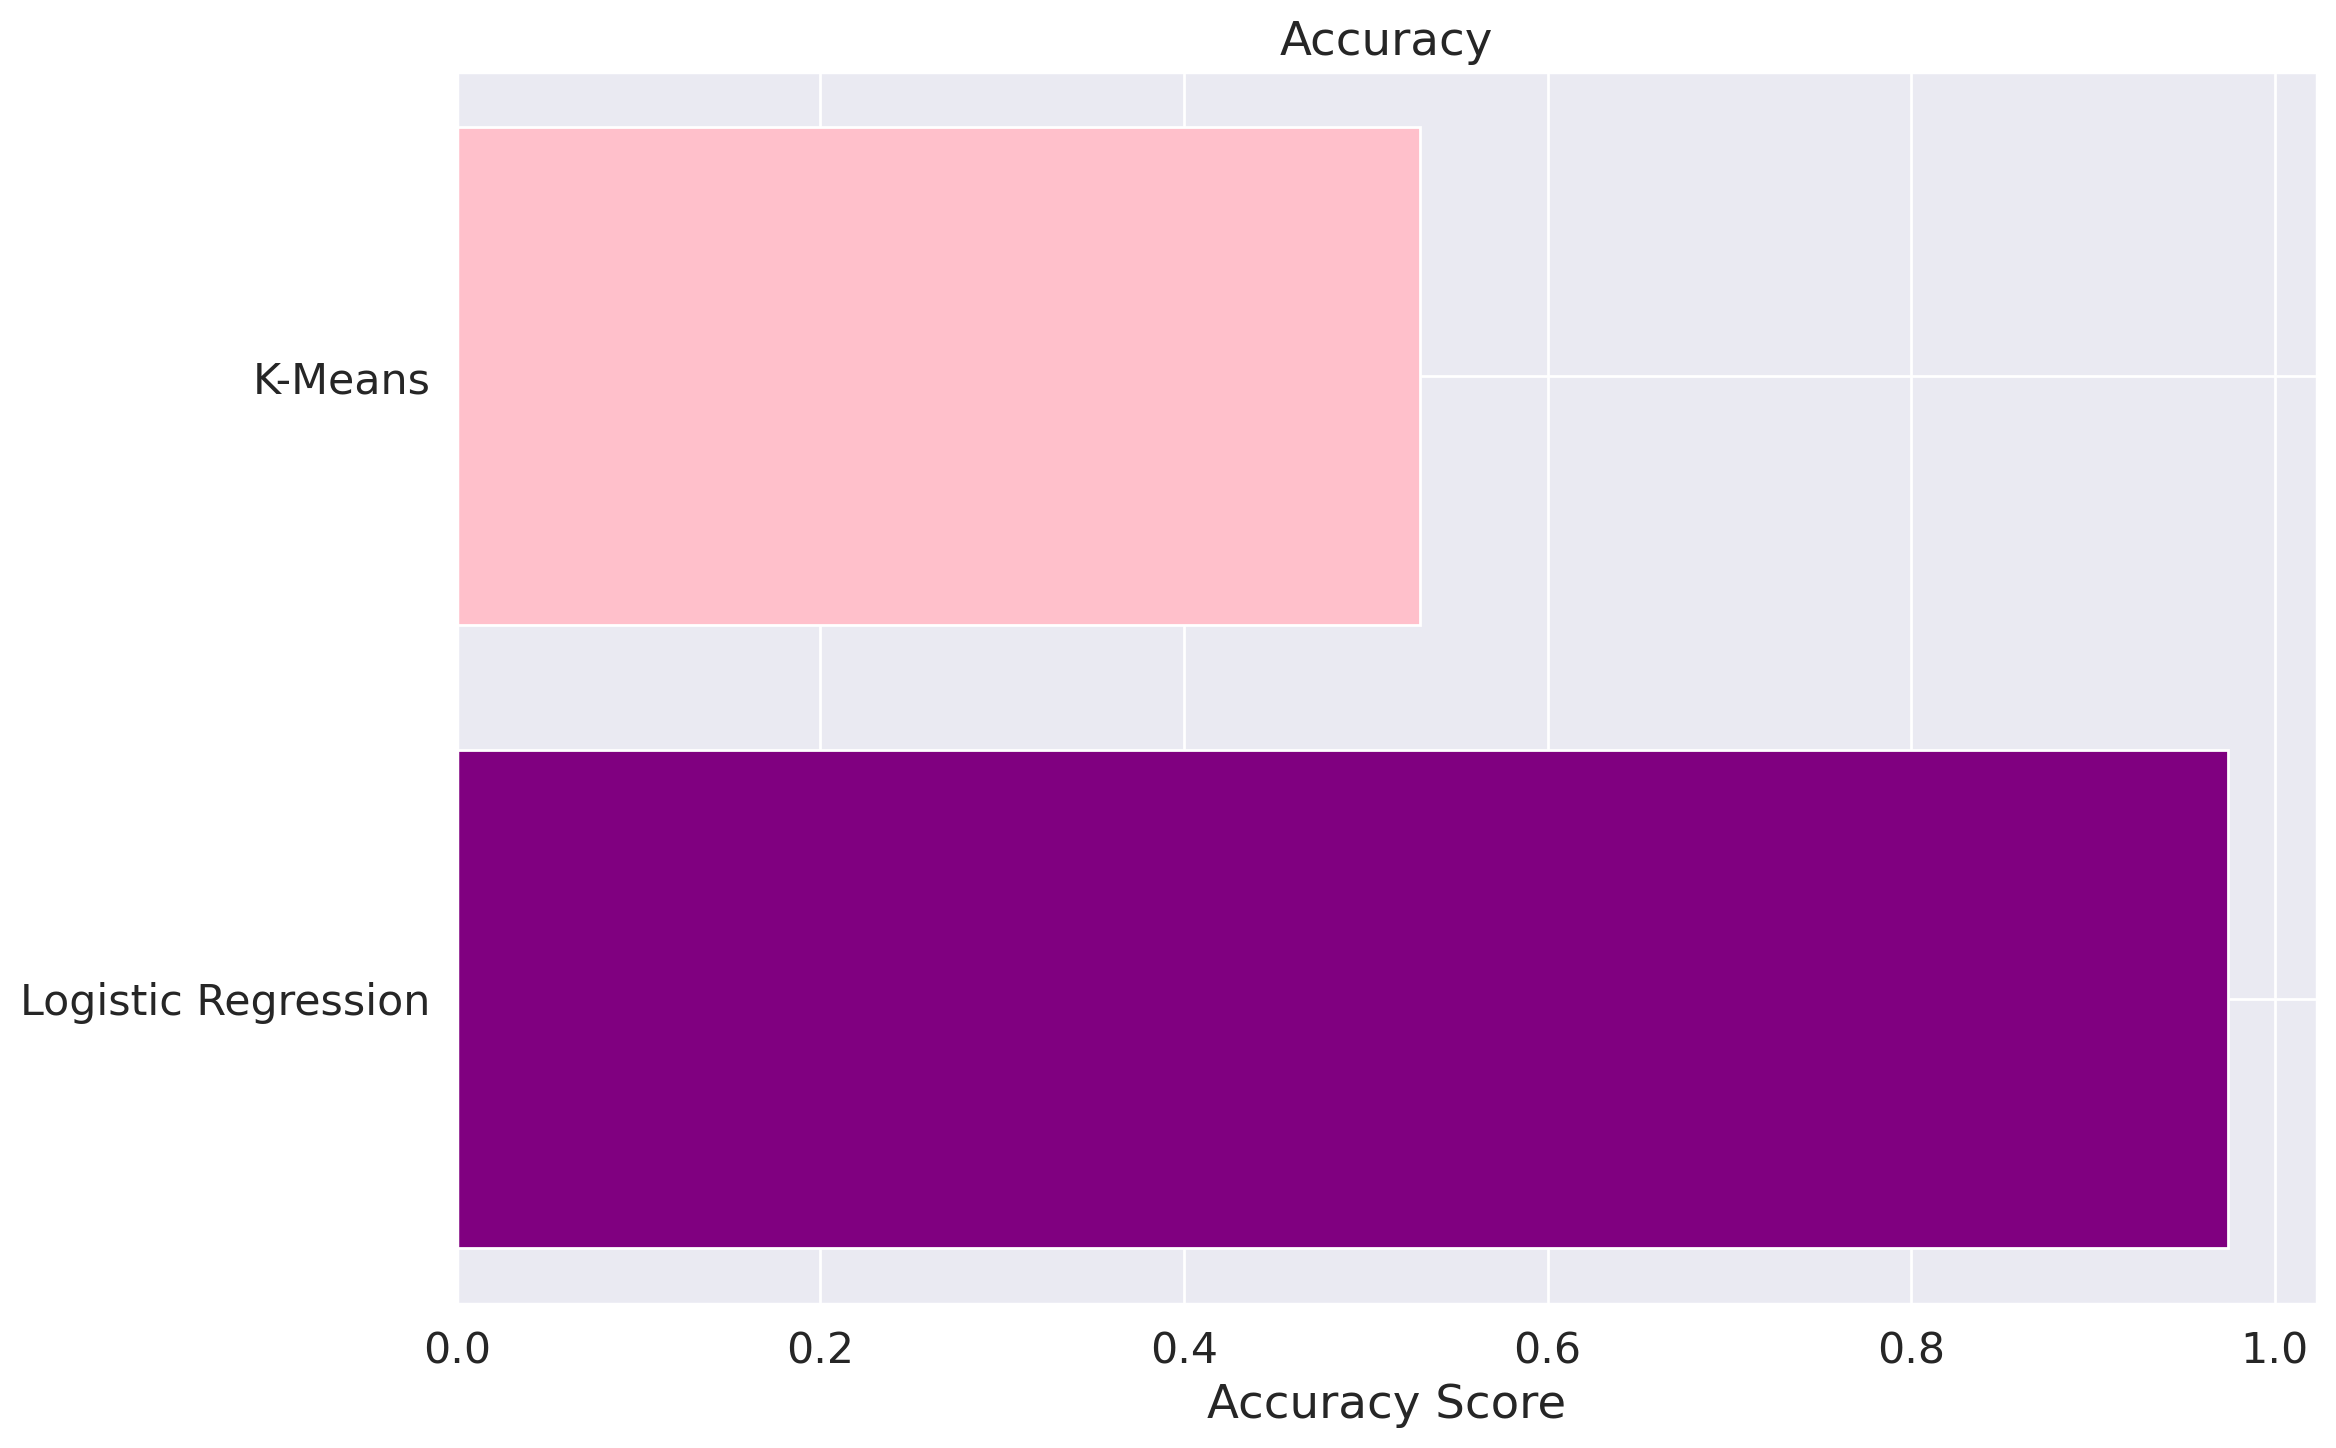

In [170]:
plt.title('Accuracy')
plt.yticks(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.keys()))
# change color to pink
plt.barh(1,accuracy,color='pink')
plt.barh(0,lr_accuracy,color='purple')
plt.xlabel('Accuracy Score')

Text(0.5, 0, 'AUC Score')

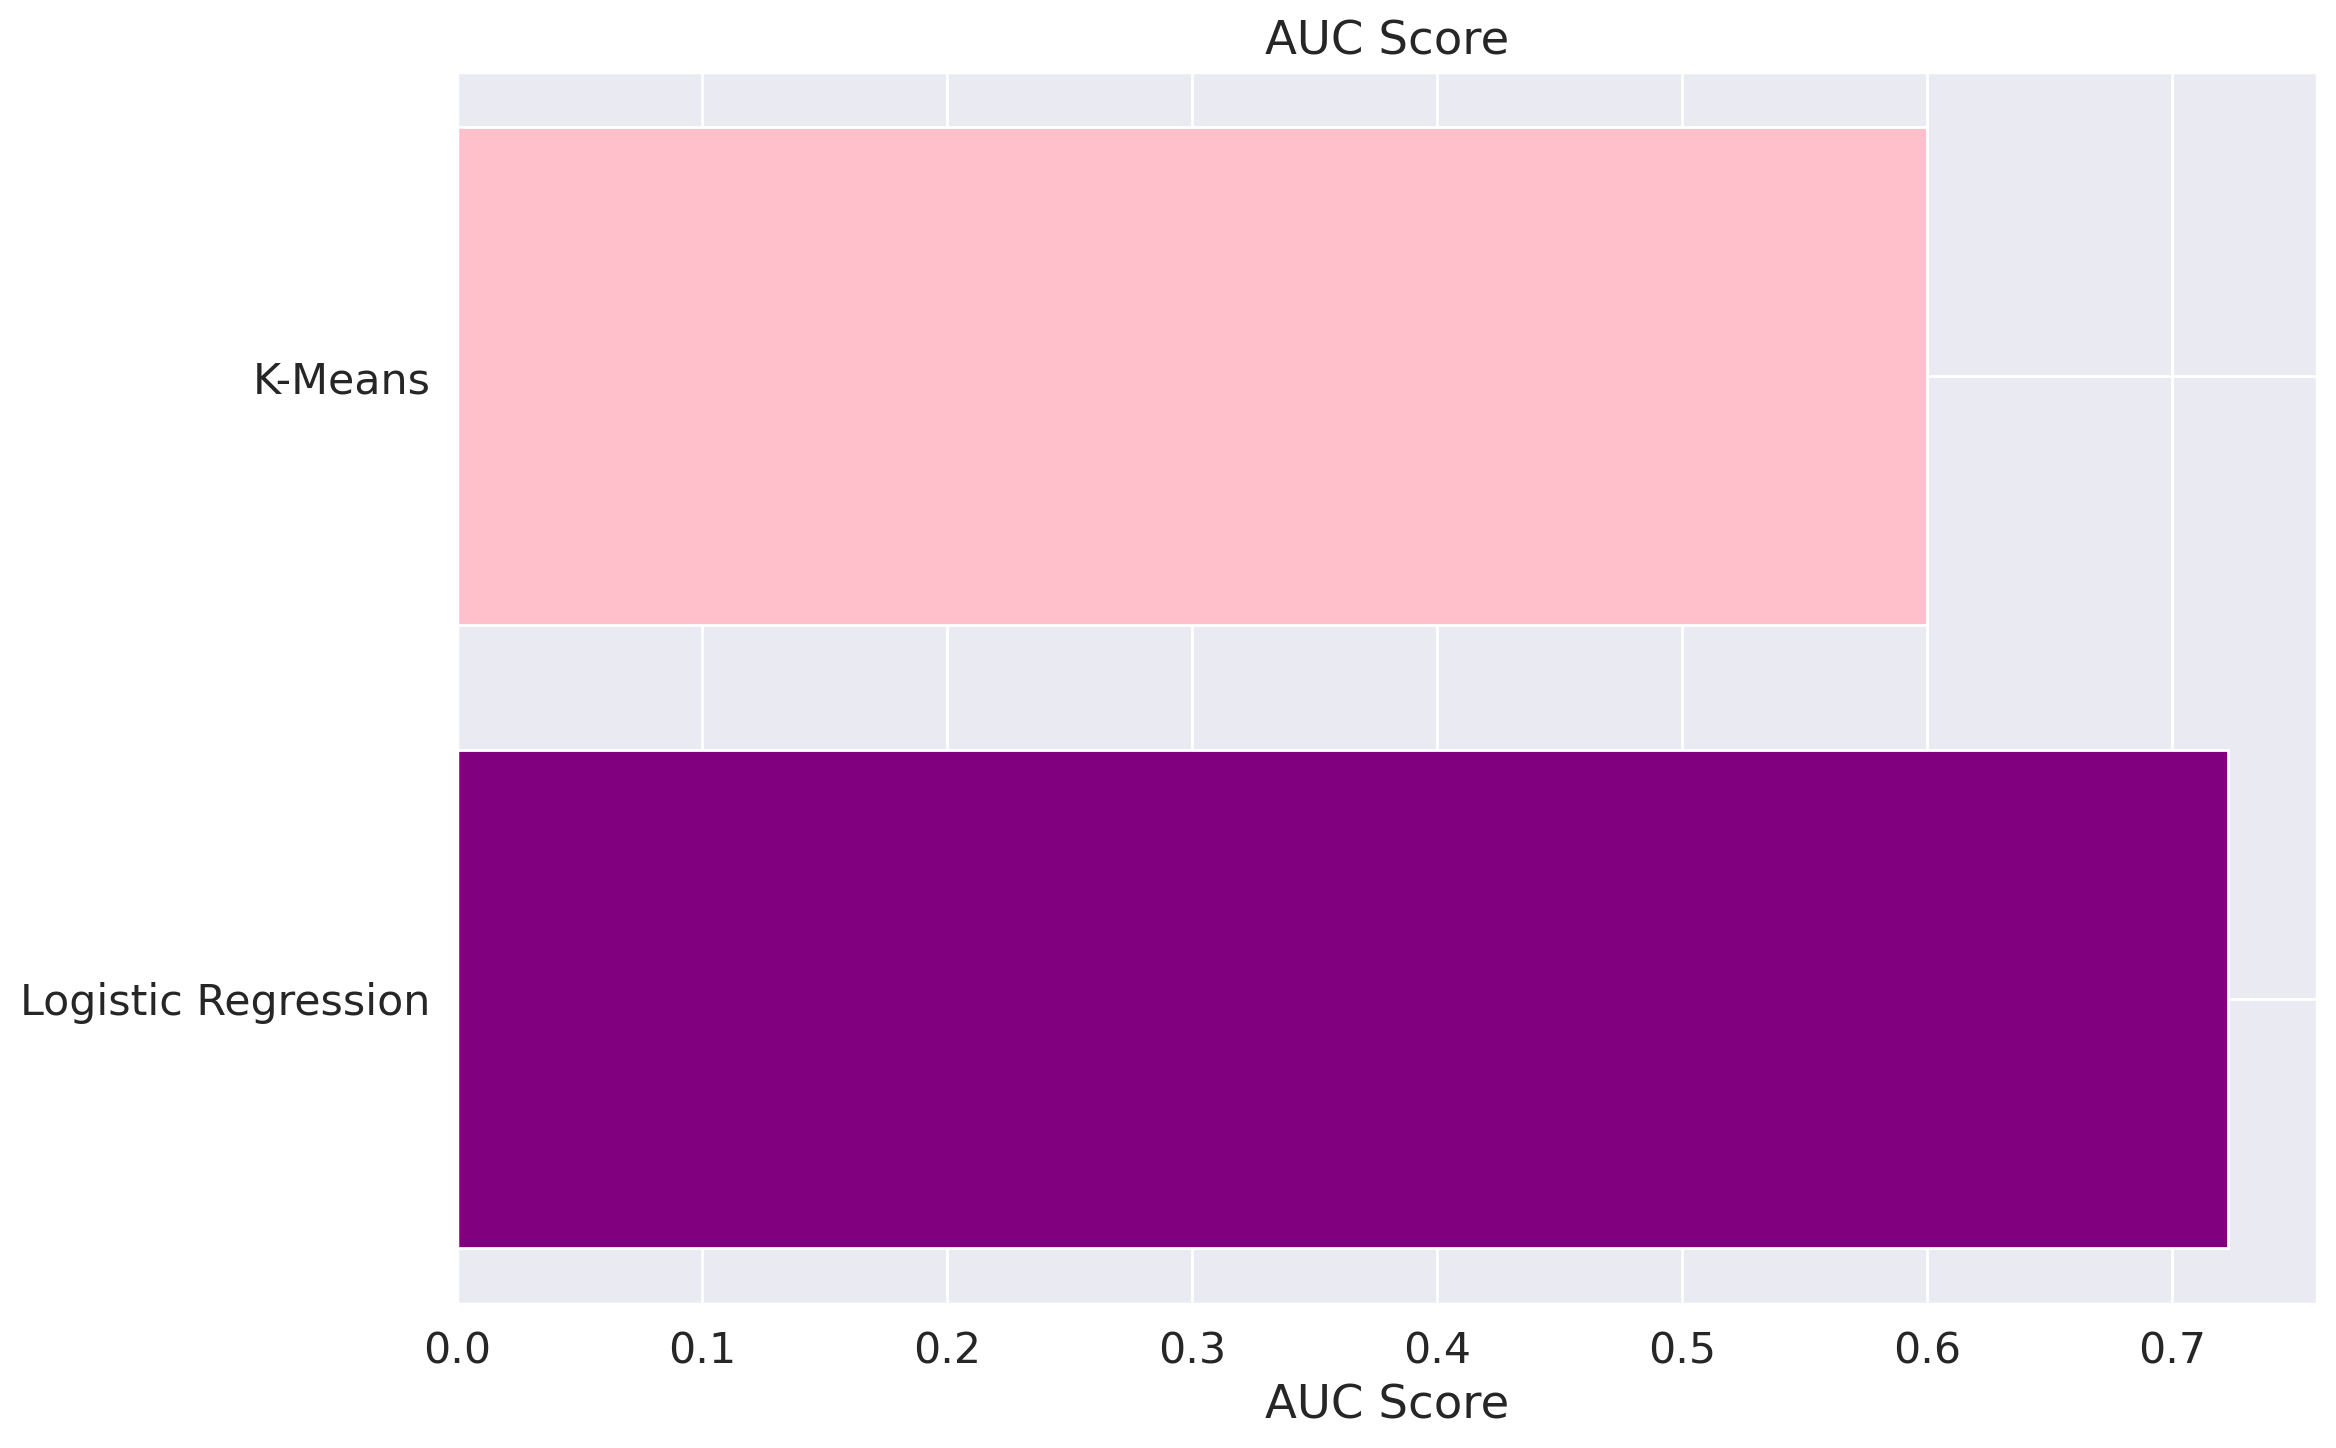

In [171]:
plt.title('AUC Score')
plt.yticks(range(len(Prediction_AUC)), list(Prediction_AUC.keys()))
# change color to pink
plt.barh(1,auc,color='pink')
plt.barh(0,auc_score,color='purple')
plt.xlabel('AUC Score')

Text(0.5, 0, 'F1 Score')

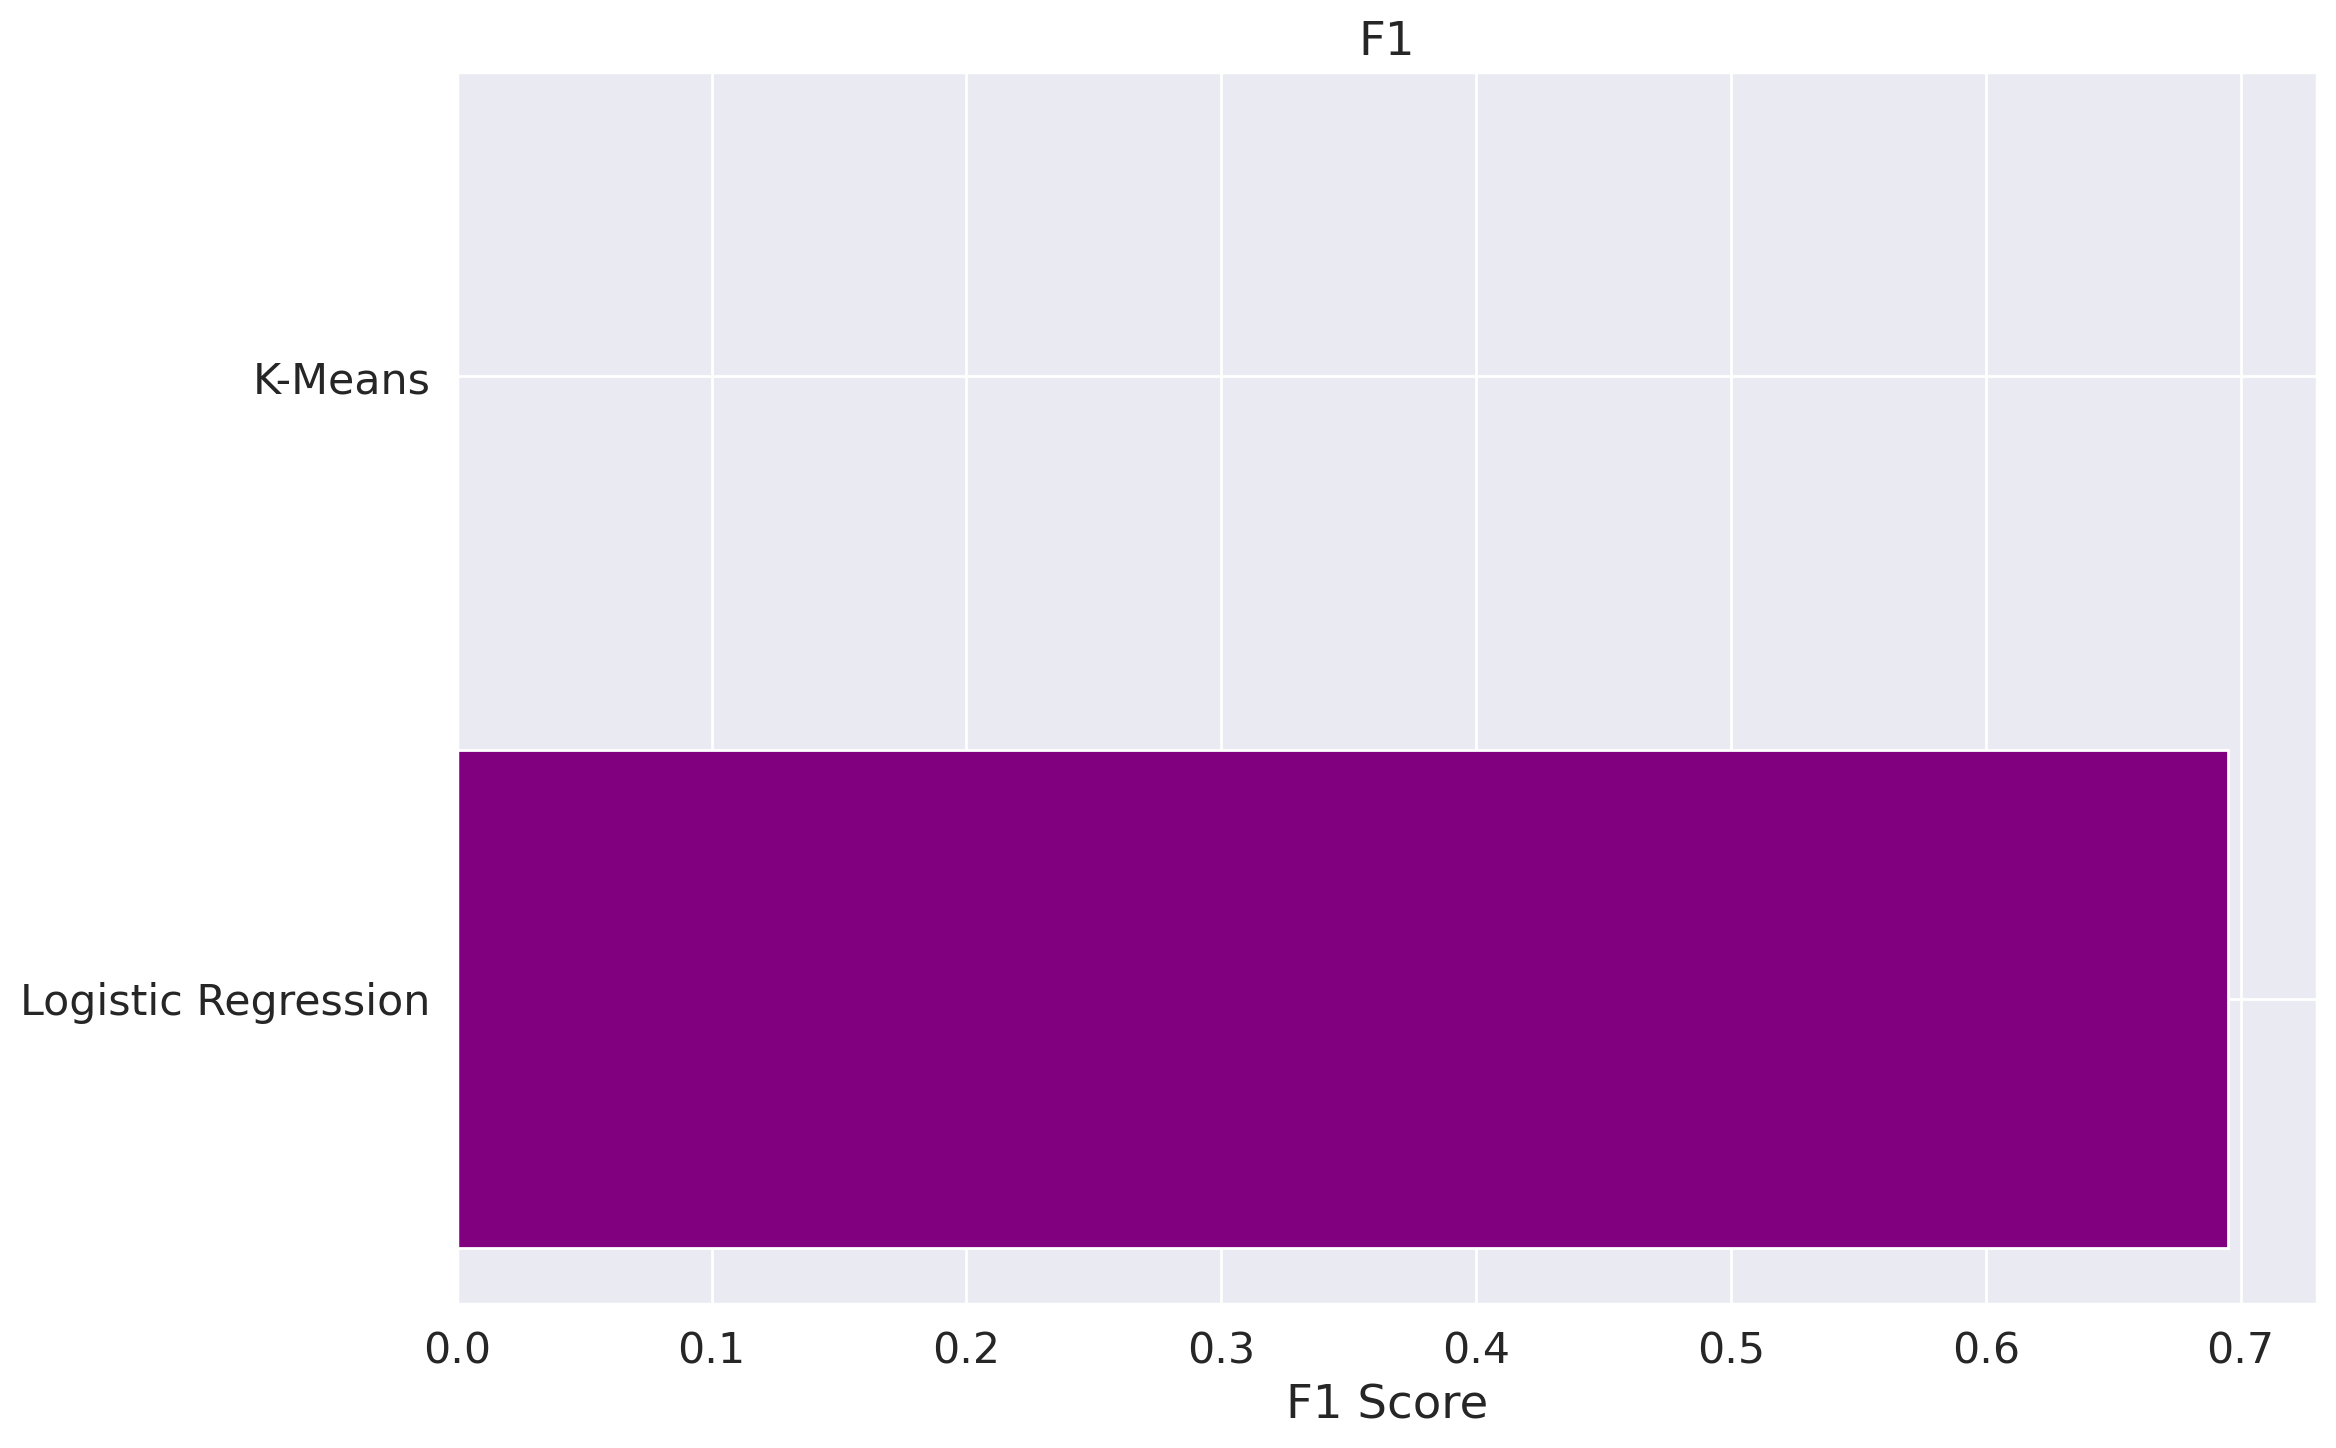

In [172]:
plt.title('F1')
plt.yticks(range(len(Prediction_F1)), list(Prediction_F1.keys()))
# change color to pink
plt.barh(1,f1_kmeans,color='pink')
plt.barh(0,f1_score_lr,color='purple')
plt.xlabel('F1 Score')

Text(0.5, 0, 'Recall Score')

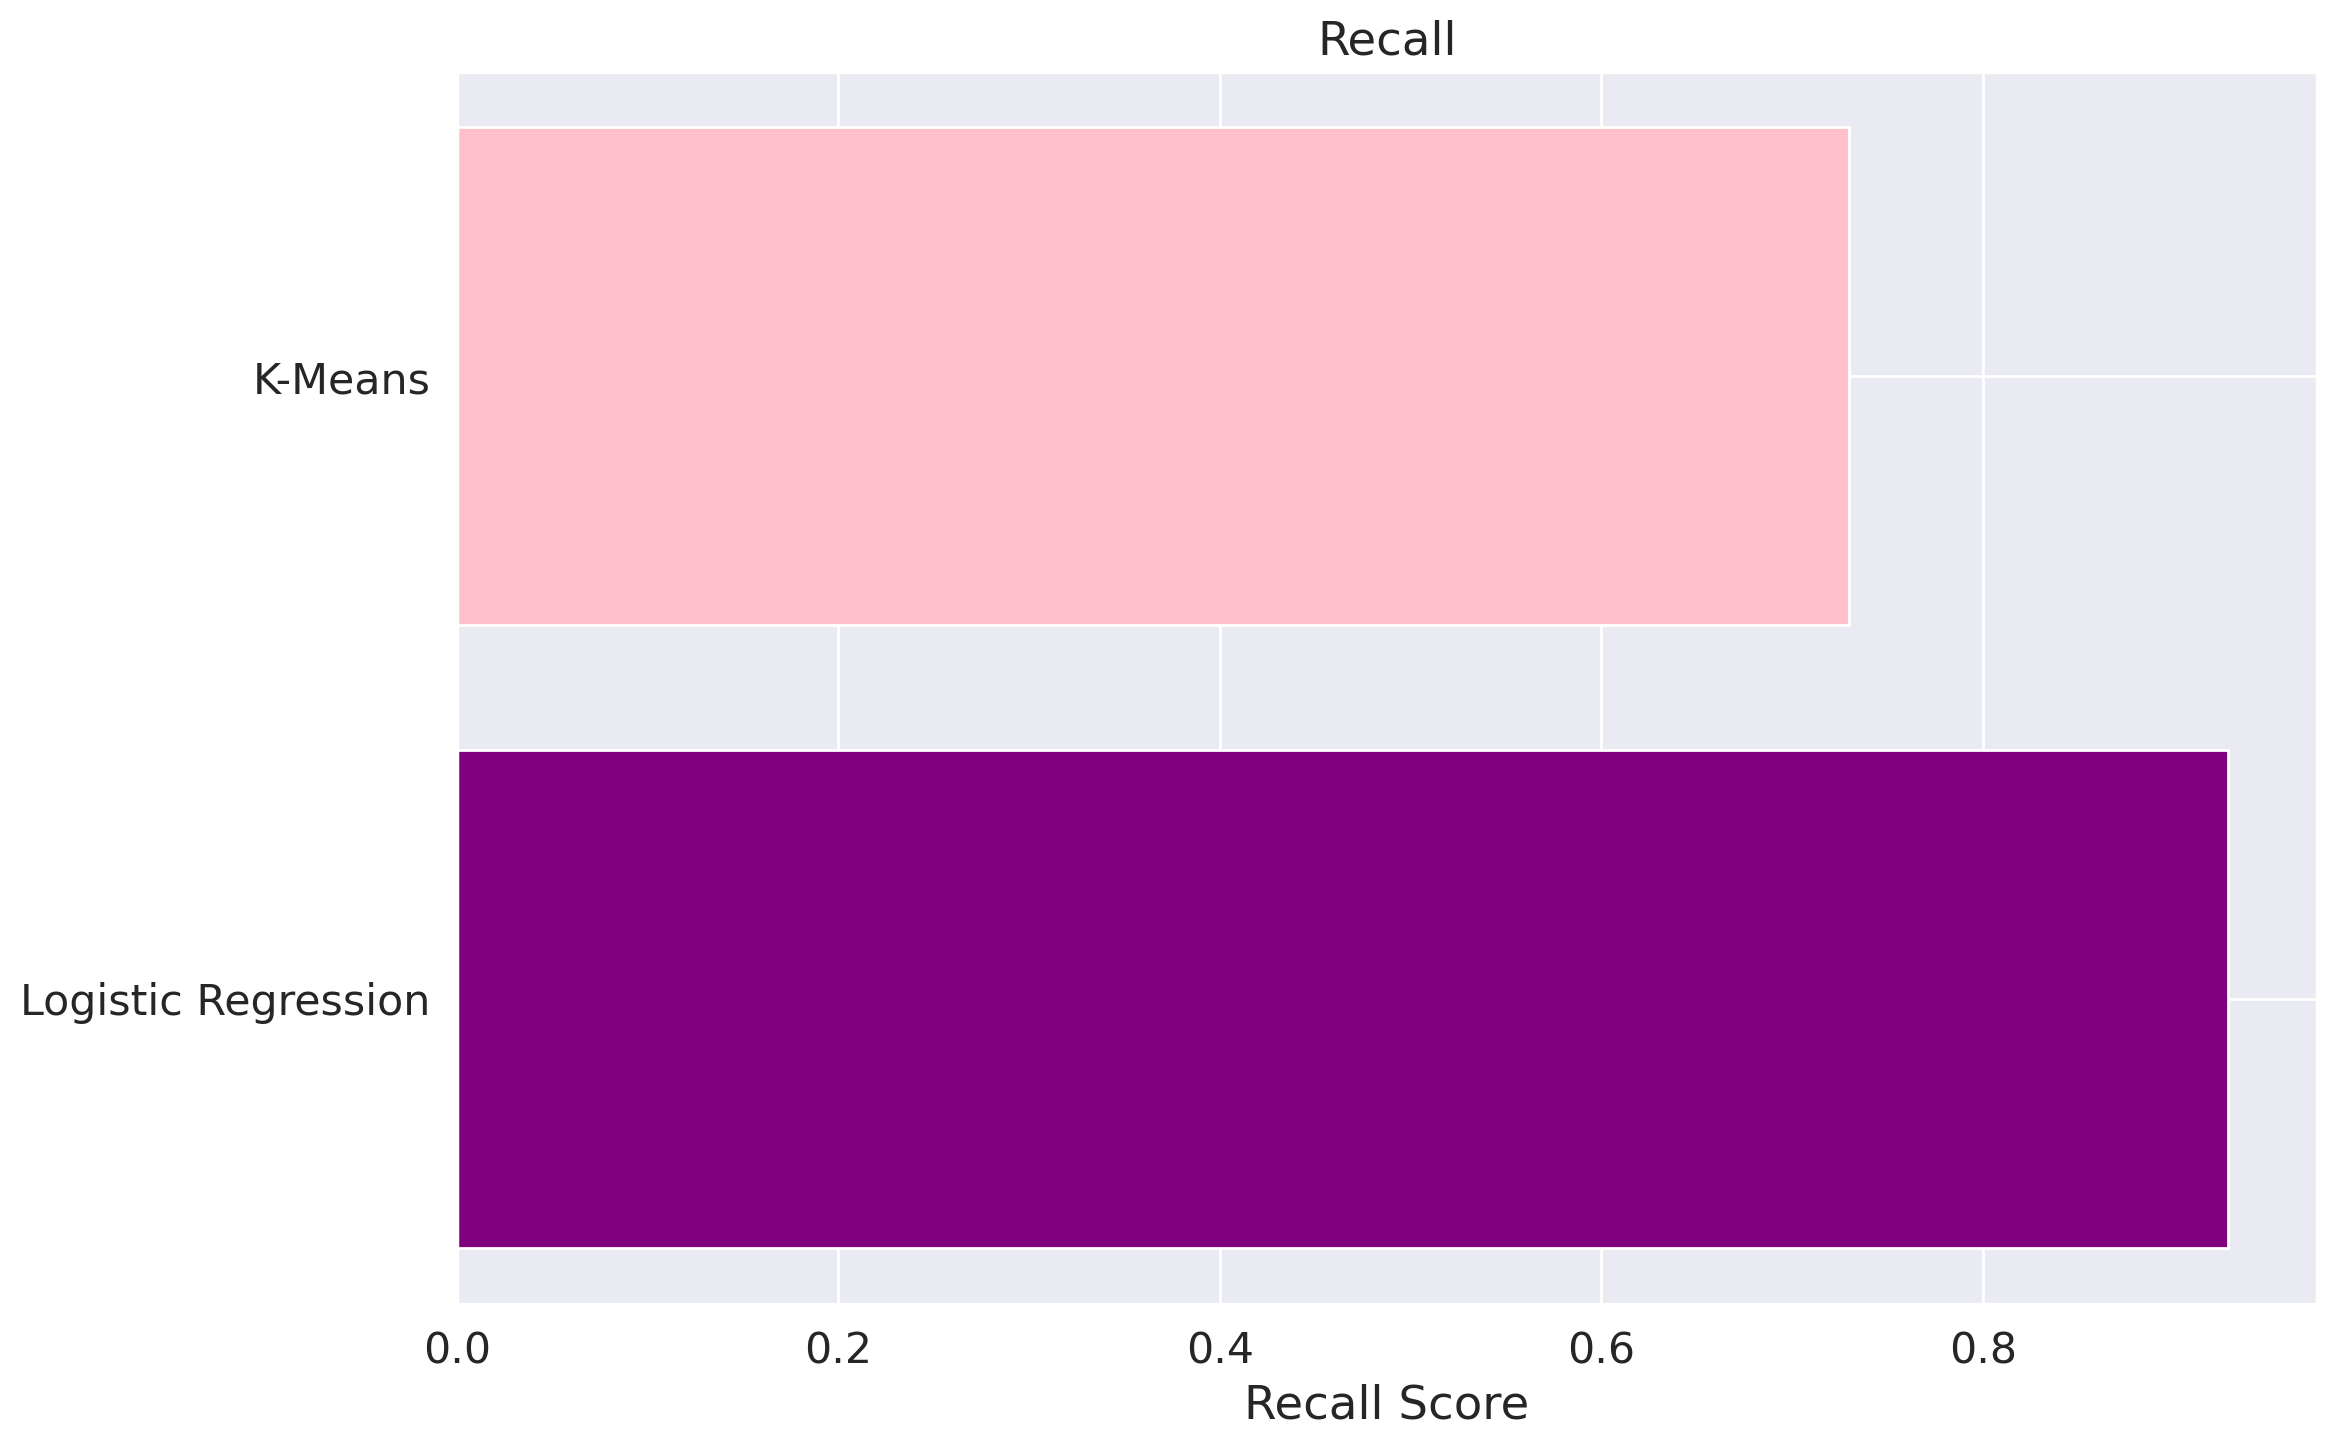

In [173]:
plt.title('Recall')
plt.yticks(range(len(Prediction_Recall)), list(Prediction_Recall.keys()))
# change color to pink
plt.barh(1,recall_kmeans,color='pink')
plt.barh(0,recall_score_lr,color='purple')
plt.xlabel('Recall Score')

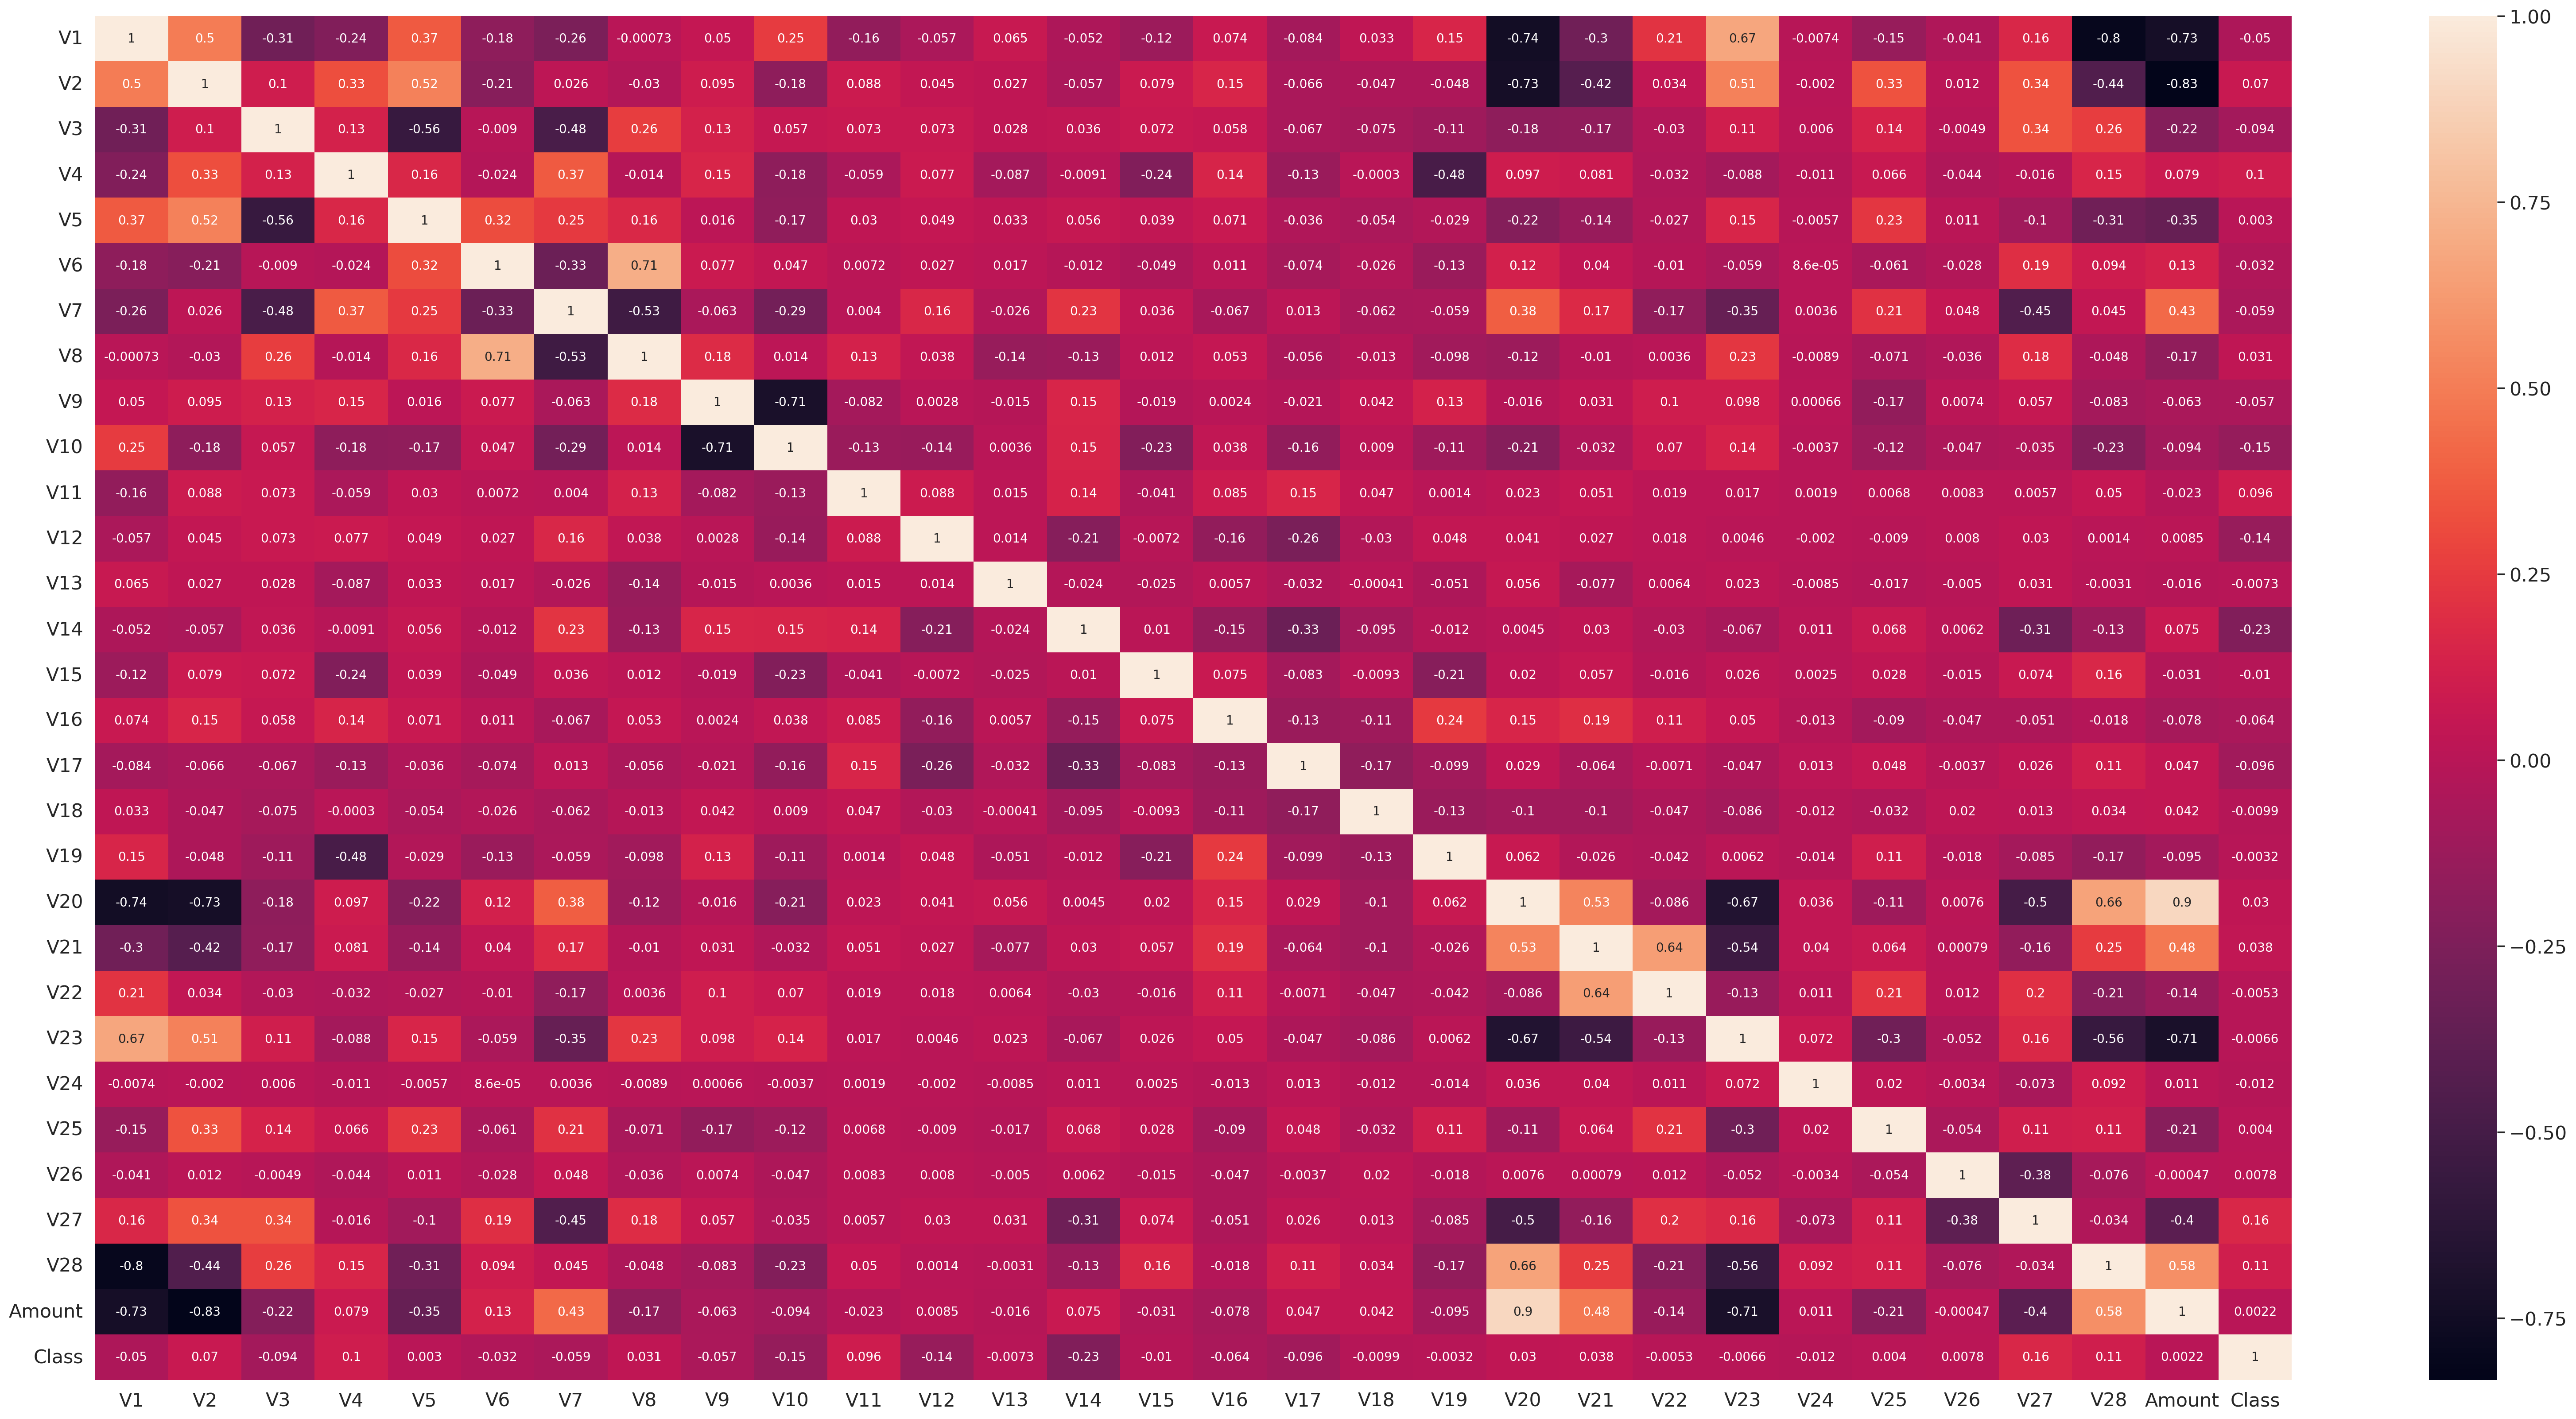

In [174]:
# plot correlation matrix properly with space arround the matrix
corr = cluster1.corr()
plt.figure(figsize=(40,20))
sns.heatmap(corr, annot_kws={'size':10}, annot=True)
plt.show()

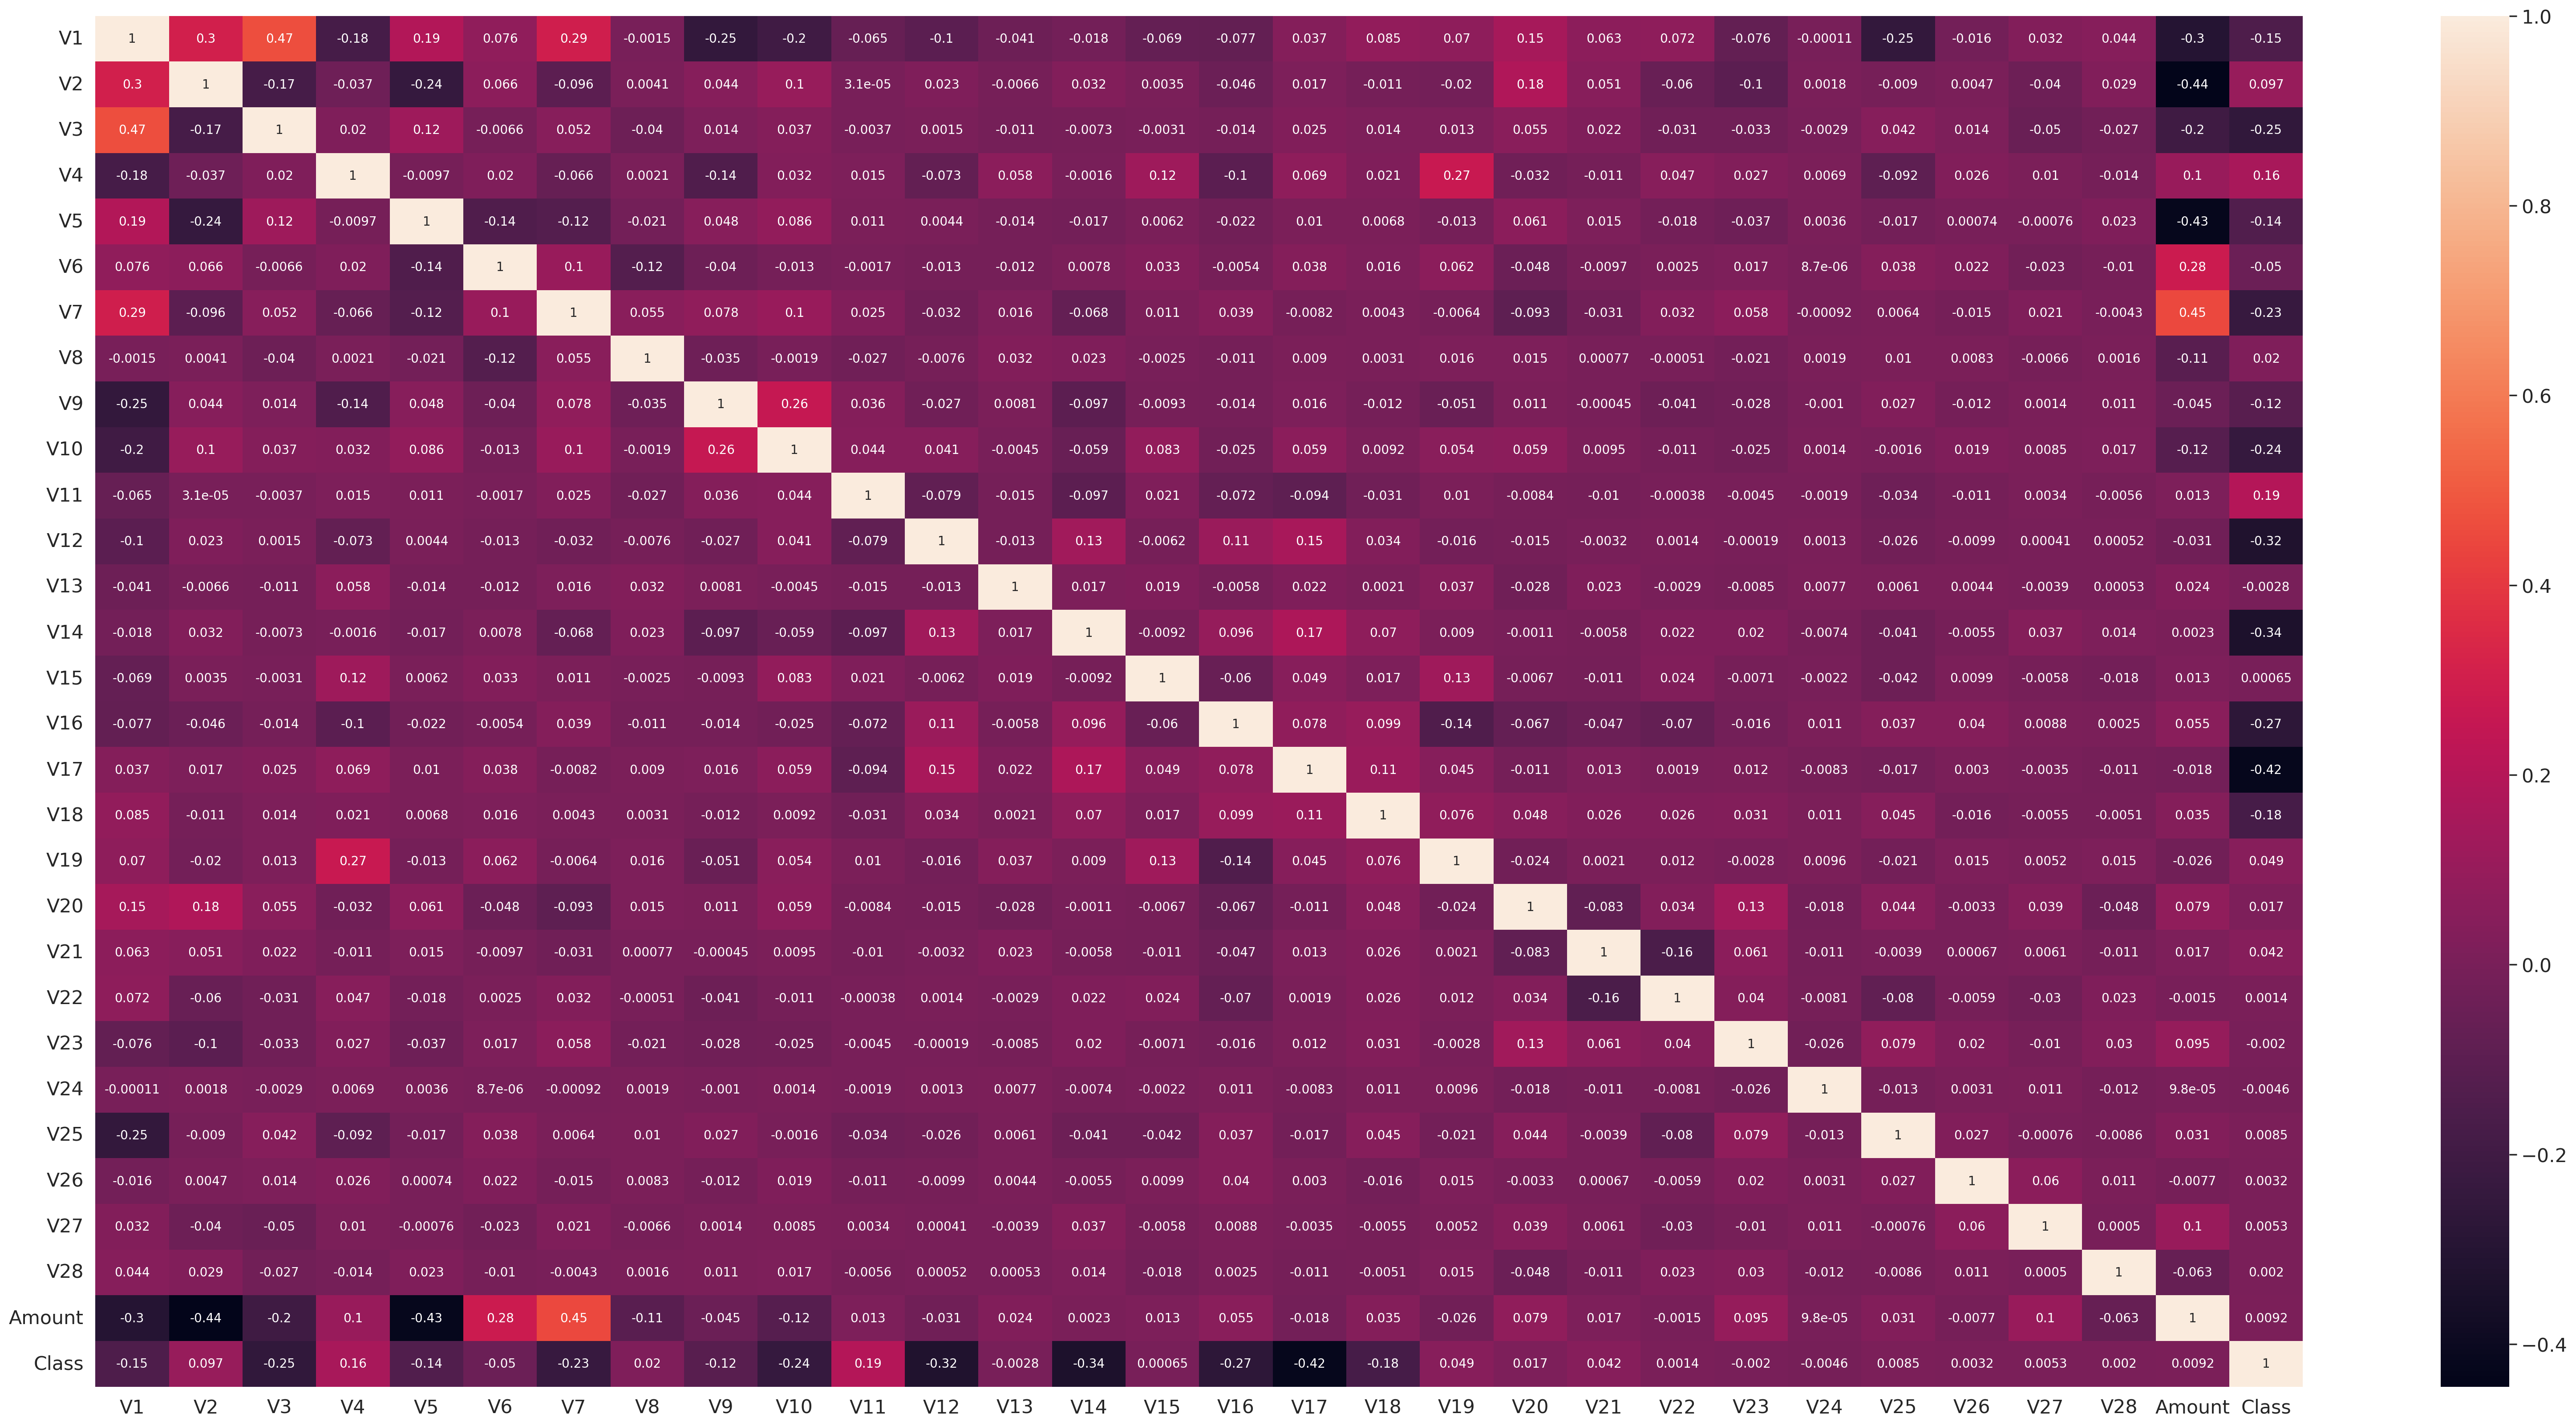

In [175]:
# plot correlation matrix properly with space arround the matrix
corr = cluster2.corr()
plt.figure(figsize=(40,20))
sns.heatmap(corr, annot_kws={'size':10}, annot=True)
plt.show()